In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import scirpy as ir
from matplotlib import pyplot as plt, cm as mpl_cm
from cycler import cycler

sc.set_figure_params(figsize=(4, 4))
sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)

/data1/maolp/mamba/envs/Pyscan/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

import anndata2ri
import rpy2.rinterface_lib.callbacks
import logging
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

anndata2ri.activate()
%load_ext rpy2.ipython


In [4]:
plt.rcParams["axes.grid"] = False

In [5]:
sc.logging.print_header()

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.0 statsmodels==0.13.5 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.8


In [6]:
import os
os.chdir("/home/maolp/data5/Gaofeng_All_matrix/Allcount/")

In [7]:
# adata1=sc.read_h5ad("./All_scanpyData/Data/Scanpy_merge_rmdoubulet_UMAP_label_lastCell.h5ad")

In [8]:
# adata1

In [9]:
adata=sc.read_h5ad("./All_scanpyData/Data/Scanpy_lastCell_BCRall.h5ad")

In [10]:
# adata.obs.Last_cell_type.value_counts()

In [11]:
# adata.obs.update(adata1.obs[["Last_cell_type"]])

In [12]:
# adata.obs.update(adata1.obs[["AdjustedID"]])

In [13]:
adata.write_h5ad("./All_scanpyData/Data/Scanpy_lastCell_BCRall.h5ad")

In [14]:
# adata1.write_h5ad("./All_scanpyData/Data/Scanpy_merge_rmdoubulet_UMAP_label_lastCell.h5ad")

In [15]:
##https://www.imgt.org/IMGTrepertoire/index.php?section=LocusGenes&repertoire=GeneOrder&species=human&group=IGH
IGHlist=pd.read_csv('/home/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_save/BCRgene/IGHV.txt',sep='\t',header=0)
IGHlist=IGHlist.rename(columns={"IMGTgenename": 'IGH',1:'locus'})
IGHlist

IGH  IMGTgeneorder
0        IGHV1-NL1              0
1        IGHV3-NL1              0
2        IGHV7-NL1              0
3     IGHV(III)-82              1
4         IGHV7-81              2
..             ...            ...
162        IGHV1-3            160
163  IGHV(III)-2-1            161
164        IGHV1-2            162
165   IGHV(II)-1-1            165
166        IGHV6-1            166

[167 rows x 2 columns]

In [17]:
# https://www.imgt.org/IMGTrepertoire/index.php?section=LocusGenes&repertoire=GeneOrder&species=human&group=TRA

In [18]:
### https://www.imgt.org/IMGTrepertoire/index.php?section=LocusGenes&repertoire=GeneOrder&species=human&group=IGK
### https://www.imgt.org/IMGTrepertoire/index.php?section=LocusGenes&repertoire=GeneOrder&species=human&group=IGL

IGKlist=pd.read_csv('/home/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_save/BCRgene/IGLK.txt',sep='\t',header=0)
IGKlist=IGKlist.rename(columns={'IMGT gene name': 'IGLK',1:'locus'})
IGKlist

IGLK  IMGT gene order
0    IGKV1-NL1                0
1     IGKV3D-7                1
2     IGKV1D-8                2
3    IGKV1D-43                3
4    IGKV1D-42                4
..         ...              ...
162    IGLV2-5               80
163    IGLV3-4               81
164    IGLV4-3               82
165    IGLV3-2               83
166    IGLV3-1               84

[167 rows x 2 columns]

In [19]:
adata.obs.to_csv("/data1/maolp/Codeman/Project/Main_Gao_ScanpyProject20231003/Gao_plot/Figure3_TCRBCR_CDR3/BCRobs.csv")

/data1/maolp/mamba/envs/Pyscan/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


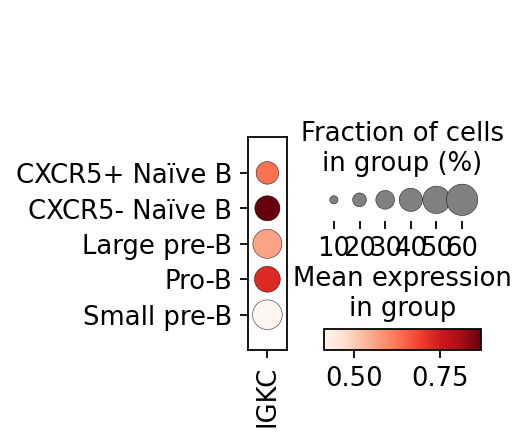

In [20]:
sc.pl.dotplot(adata,['IGKC'],groupby='Last_cell_type')

In [21]:

IGKJreallist=pd.read_csv('/home/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_save/BCRgene/IGKJ.txt',sep='\t',header=0)
IGKJreallist=IGKJreallist.rename(columns={'IMGT gene name': 'IGKJ',1:'locus'})
IGKJreallist
IGKJrealistvalues=IGKJreallist['IGKJ'].values.tolist()
IGKJrealistvalues

['IGKJ1', 'IGKJ2', 'IGKJ3', 'IGKJ4', 'IGKJ5']

In [22]:

IGLJreallist=pd.read_csv('/home/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_save/BCRgene/IGLJ.txt',sep='\t',header=0)
IGLJreallist=IGLJreallist.rename(columns={'IMGT gene name': 'IGLJ',1:'locus'})
IGLJreallist
IGLJrealistvalues=IGLJreallist['IGLJ'].values.tolist()
IGLJrealistvalues

['IGLJ1',
 'IGLC1',
 'IGLJ2',
 'IGLC2',
 'IGLJ3',
 'IGLC3',
 'IGLJ4',
 'IGLC4',
 'IGLJ5',
 'IGLC5',
 'IGLJ6',
 'IGLC6',
 'IGLJ7',
 'IGLC7']

In [23]:

IGLreallist=pd.read_csv('/home/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_save/BCRgene/IGLV.txt',sep='\t',header=0)
IGLreallist=IGLreallist.rename(columns={'IMGT gene name': 'IGLK',1:'locus'})
IGLreallist
IGLrealistvalues=IGLreallist['IGLK'].values.tolist()
IGLrealistvalues

['BCRP2 (BCRL2)',
 'IGLV(I)-70',
 'IGLV4-69',
 'IGLV(I)-68',
 'IGLV10-67',
 'IGLV(IV)-66-1',
 'IGLV(V)-66',
 'IGLV(IV)-65',
 'IGLV(IV)-64',
 'IGLV(I)-63',
 'IGLV1-62',
 'IGLV8-61',
 'IGLV4-60',
 'IGLV(IV)-59',
 'IGLV(V)-58',
 'BMP6P1 (TGFb1)',
 'IGLV6-57',
 'IGLV(I)-56',
 'IGLV11-55',
 'IGLV10-54',
 'IGLV(IV)-53',
 'VPREB',
 'IGLV5-52',
 'IGLV1-51',
 'IGLV1-50',
 'IGLV9-49',
 'IGLV5-48',
 'IGLV1-47',
 'IGLV7-46',
 'IGLV5-45',
 'IGLV1-44',
 'IGLV7-43',
 'IGLV(I)-42',
 'IGLV(VII)-41-1',
 'IGLV1-41',
 'IGLV1-40',
 'IGLV5-39',
 'IGLV(I)-38',
 'IGLV5-37',
 'IGLV1-36',
 'IGLV7-35',
 "ZNF280B (5'0Y11.1)",
 "ZNF280A (3'0Y11.1)",
 'PRAME',
 'IGLV2-34',
 'IGLV2-33',
 'IGLV3-32',
 'IGLV3-31',
 'IGLV3-30',
 'BCRP4 (BCRL4)',
 'POM121L1P (POM121)',
 'GGTLC2 (GGT)',
 '(GGT-tel)',
 'IGLV3-29',
 'IGLV2-28',
 'IGLV3-27',
 'IGLV3-26',
 'IGLV(VI)-25-1',
 'IGLV3-25',
 'IGLV3-24',
 'IGLV2-23',
 'IGLV(VI)-22-1',
 'IGLV3-22',
 'IGLV3-21',
 'IGLV(I)-20',
 'IGLV3-19',
 'IGLV2-18',
 'IGLV3-17',
 'IGLV3-16',
 'IG

In [24]:
IGLreallist.head()

IGLK  IMGT gene order
0  BCRP2 (BCRL2)                1
1     IGLV(I)-70                2
2       IGLV4-69                3
3     IGLV(I)-68                4
4      IGLV10-67                5

In [25]:

IGKreallist=pd.read_csv('/home/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_save/BCRgene/IGKV.txt',sep='\t',header=0)
IGKreallist=IGKreallist.rename(columns={'IMGT gene name': 'IGLK',1:'locus'})
IGKreallist


IGLK  IMGT gene order
0   IGKV1-NL1                0
1    IGKV3D-7                1
2    IGKV1D-8                2
3   IGKV1D-43                3
4   IGKV1D-42                4
..        ...              ...
72    IGKV1-5               72
73    IGKV2-4               73
74    IGKV7-3               74
75    IGKV5-2               75
76    IGKV4-1               76

[77 rows x 2 columns]

In [26]:
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

def calculate_BCRVDJ_heatmap(input_adata, input_TRBVlist_values, input_IR='IR_VDJ_1_v_call', input_cell_type=['Naïve B'], input_adjusted_id='T12.P25'):
    selected_adata = input_adata[input_adata.obs['Last_cell_type'].isin(input_cell_type)]
    selected_adata.obs['Organ_cell_type'] = selected_adata.obs['Last_cell_type'].astype('str') + "_" + selected_adata.obs['AdjustedID'].astype('str')
    
    BCR_chain_data = None
    selected_ct = sorted(selected_adata.obs['Organ_cell_type'].unique())
    input_dict = {
       input_IR : input_TRBVlist_values}
    
    for dict_name in list(input_dict.keys()):
        intermediate_df = pd.DataFrame(columns = input_dict[dict_name],  index = selected_ct)
        
        for cell in intermediate_df.index:
            counter = Counter(selected_adata.obs.loc[selected_adata.obs['Organ_cell_type'] == cell, dict_name])
            for chain_type in intermediate_df.columns:
                intermediate_df.loc[cell, chain_type] = counter[chain_type]
            
            intermediate_df.loc[cell, :] = intermediate_df.loc[cell, :] / np.sum(intermediate_df.loc[cell, :]) * 100
        
        if BCR_chain_data is None:
            BCR_chain_data = intermediate_df.copy()
        else:
            BCR_chain_data = pd.concat([BCR_chain_data, intermediate_df], axis=1)
    
    fig, ax = plt.subplots(figsize=(BCR_chain_data.shape[1]/2, BCR_chain_data.shape[0]/2))
    uniform_data = BCR_chain_data.astype('float')
    ax = sb.heatmap(uniform_data, cmap='RdYlBu_r', yticklabels=True)
    _, xlabels = plt.xticks()
    _, ylabels = plt.yticks()
    ax.set_xticklabels(xlabels, size=20, rotation=90)
    ax.set_yticklabels(ylabels, size=20, rotation=0)
    
    return BCR_chain_data, fig

In [27]:

IGHlistvalues=IGHlist['IGH'].values.tolist()
IGKlistvalues=IGKlist['IGLK'].values.tolist()
IGKrealistvalues=IGKreallist['IGLK'].values.tolist()

In [28]:
adata.obs['AdjustedID'].value_counts()

S24.6_P11    4678
S18.6_P5     3962
B18.6_P5     1965
L24.6_P11    1618
B31.3_P15    1469
B34.1_P18    1345
B30.4_P14    1329
B32.4_P16    1263
B18.0_P4     1185
B22.4_P23    1159
L18.6_P5     1107
B23.4_P10    1054
B39.1_P22    1018
B20.9_P7      983
B33.3_P17     978
B11.6_P24     964
B26.9_P12     811
B37.9_P20     747
B38.1_P21     731
B21.7_P8      717
B36.1_P19     605
B29.1_P13     471
B24.6_P11     458
B22.4_P9      379
L10.1_P25     195
T18.6_P5      108
B17.4_P3       90
T24.6_P11      76
L10.0_P1       28
T10.0_P1        6
T10.1_P25       3
Name: AdjustedID, dtype: int64

In [29]:
# adata_noT12.obs['AdjustedID'].value_counts()

In [30]:
adata_noT12=adata[~adata.obs['AdjustedID'].str.contains('T12')]
adata_noT12

View of AnnData object with n_obs × n_vars = 31502 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2', 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_juncti

/tmp/ipykernel_112641/1191420148.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  selected_adata.obs['Organ_cell_type'] = selected_adata.obs['Last_cell_type'].astype('str') + "_" + selected_adata.obs['AdjustedID'].astype('str')


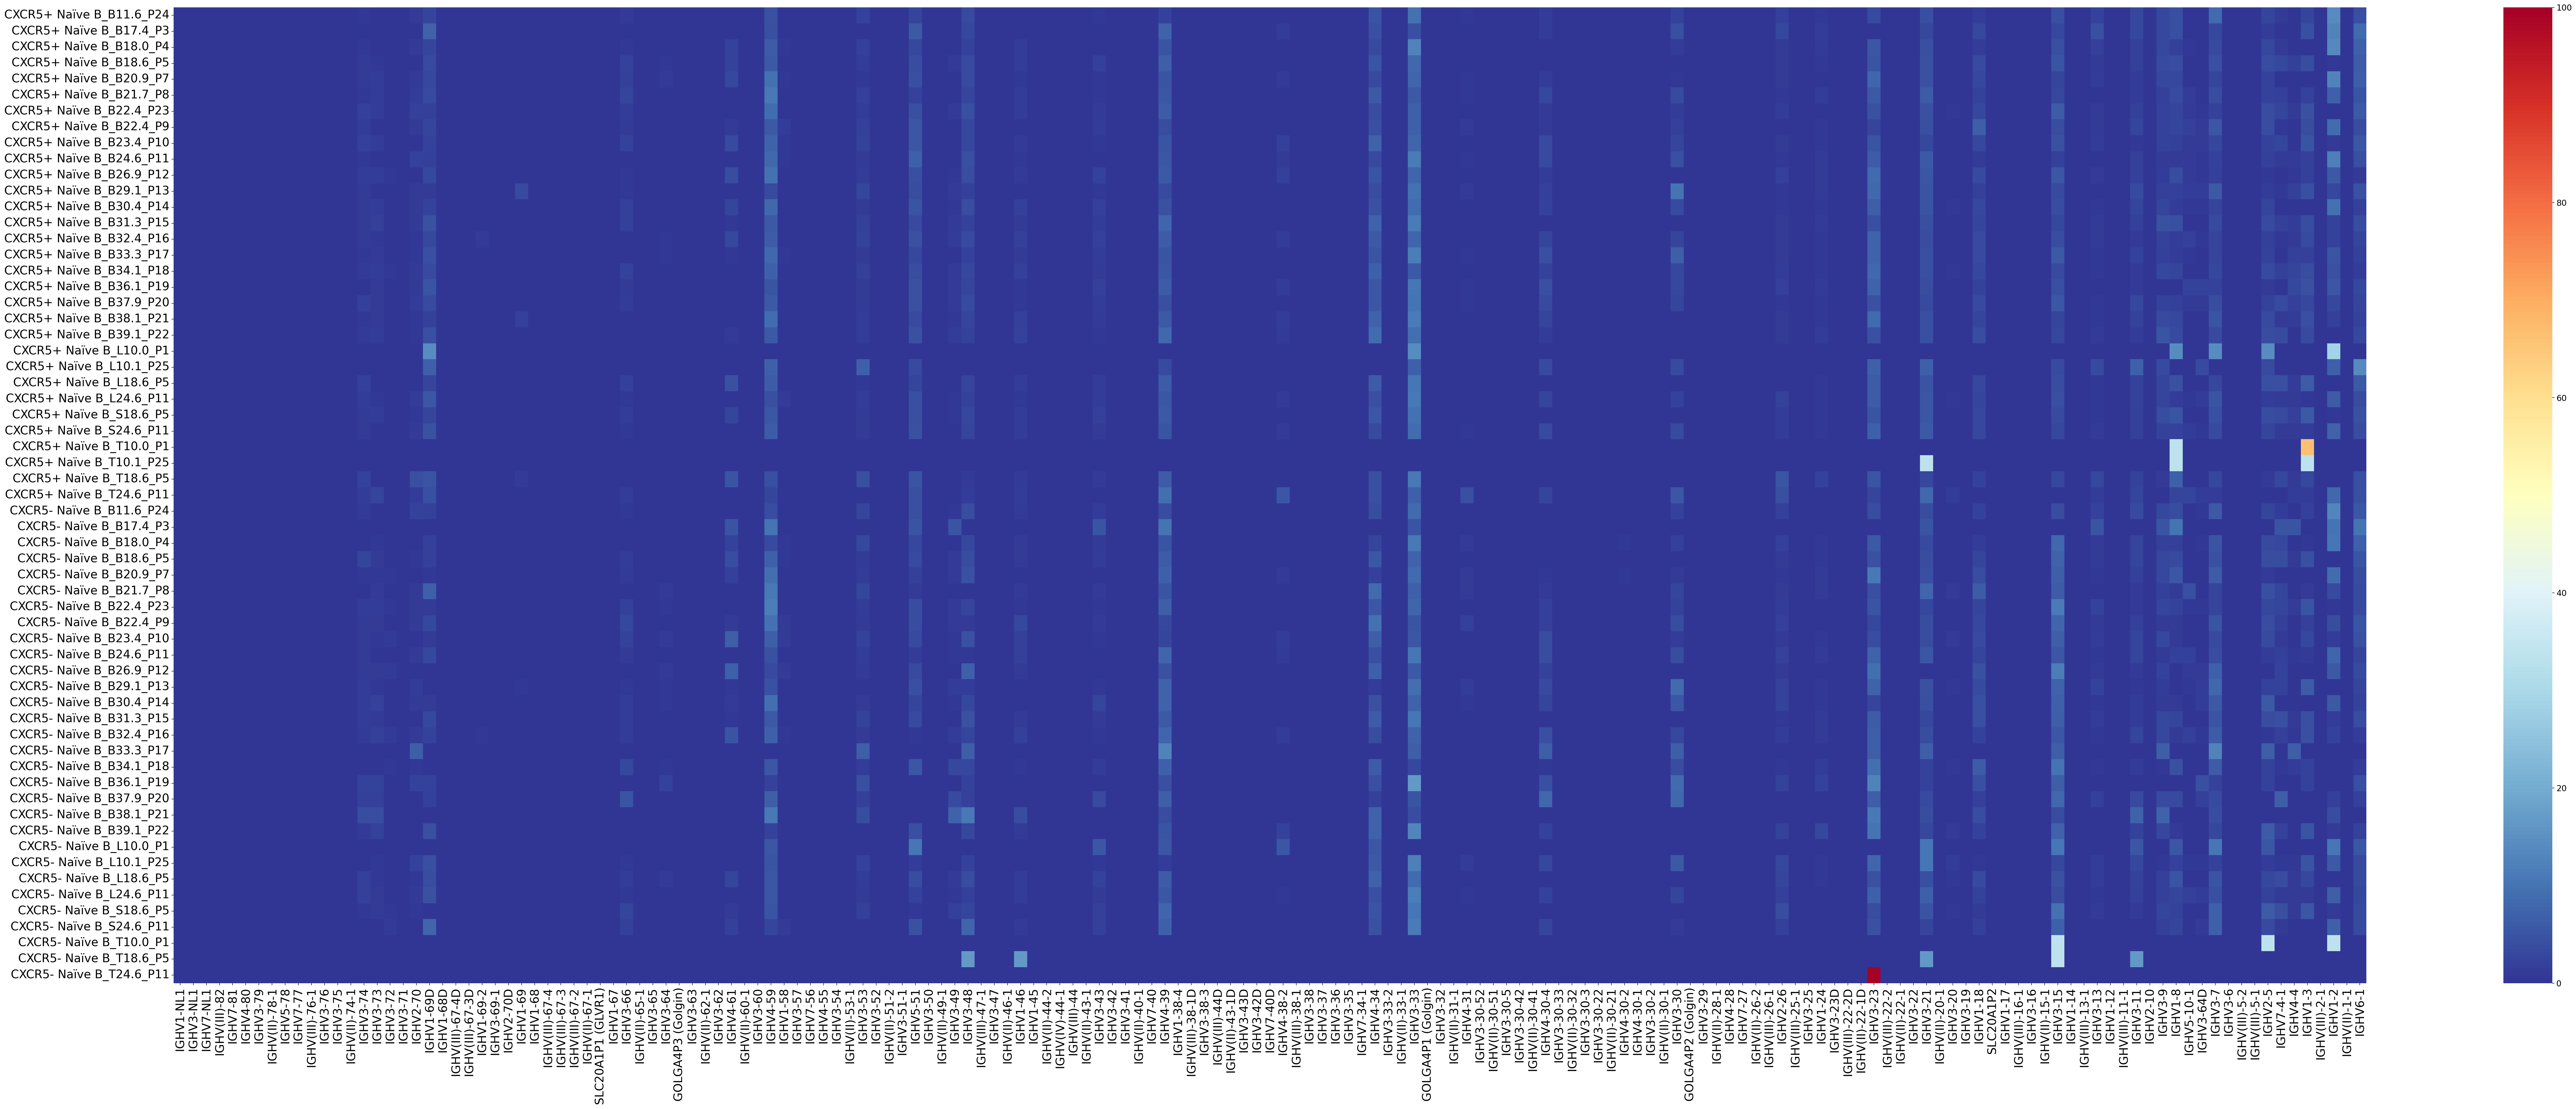

In [31]:
BCRH_chain, BCRHfig = calculate_BCRVDJ_heatmap(adata_noT12,IGHlistvalues ,input_IR='IR_VDJ_1_v_call',input_cell_type=['CXCR5- Naïve B','CXCR5+ Naïve B'])

In [32]:
BCRH_chain.index

Index(['CXCR5+ Naïve B_B11.6_P24', 'CXCR5+ Naïve B_B17.4_P3',
       'CXCR5+ Naïve B_B18.0_P4', 'CXCR5+ Naïve B_B18.6_P5',
       'CXCR5+ Naïve B_B20.9_P7', 'CXCR5+ Naïve B_B21.7_P8',
       'CXCR5+ Naïve B_B22.4_P23', 'CXCR5+ Naïve B_B22.4_P9',
       'CXCR5+ Naïve B_B23.4_P10', 'CXCR5+ Naïve B_B24.6_P11',
       'CXCR5+ Naïve B_B26.9_P12', 'CXCR5+ Naïve B_B29.1_P13',
       'CXCR5+ Naïve B_B30.4_P14', 'CXCR5+ Naïve B_B31.3_P15',
       'CXCR5+ Naïve B_B32.4_P16', 'CXCR5+ Naïve B_B33.3_P17',
       'CXCR5+ Naïve B_B34.1_P18', 'CXCR5+ Naïve B_B36.1_P19',
       'CXCR5+ Naïve B_B37.9_P20', 'CXCR5+ Naïve B_B38.1_P21',
       'CXCR5+ Naïve B_B39.1_P22', 'CXCR5+ Naïve B_L10.0_P1',
       'CXCR5+ Naïve B_L10.1_P25', 'CXCR5+ Naïve B_L18.6_P5',
       'CXCR5+ Naïve B_L24.6_P11', 'CXCR5+ Naïve B_S18.6_P5',
       'CXCR5+ Naïve B_S24.6_P11', 'CXCR5+ Naïve B_T10.0_P1',
       'CXCR5+ Naïve B_T10.1_P25', 'CXCR5+ Naïve B_T18.6_P5',
       'CXCR5+ Naïve B_T24.6_P11', 'CXCR5- Naïve B_B11.6_P24',
   

In [33]:
adata_select=adata
v_call_B_VDJ_main_list = list(adata_select.obs['v_call_B_VDJ_main'].cat.categories)
d_call_B_VDJ_main_list = list(adata_select.obs['d_call_B_VDJ_main'].cat.categories)
j_call_B_VDJ_main_list = list(adata_select.obs['j_call_B_VDJ_main'].cat.categories)
v_call_B_VJ_main_list = list(adata_select.obs['v_call_B_VJ_main'].cat.categories)
j_call_B_VJ_main_list = list(adata_select.obs['j_call_B_VJ_main'].cat.categories)

TCR_list = v_call_B_VJ_main_list+j_call_B_VJ_main_list+v_call_B_VDJ_main_list +d_call_B_VDJ_main_list +j_call_B_VDJ_main_list 

In [34]:
# v_call_B_VDJ_main_list

In [35]:

set_v_call = set(v_call_B_VDJ_main_list)
set_IGH = set(IGHlistvalues)

difference_v_call = set_v_call.difference(set_IGH)
difference_IGH = set_IGH.difference(set_v_call)

print("Elements in v_call_B_VDJ_main_list but not in IGHlistvalues: ", len(difference_v_call))
print("Elements in IGHlistvalues but not in v_call_B_VDJ_main_list: ", len(difference_IGH))

Elements in v_call_B_VDJ_main_list but not in IGHlistvalues:  0
Elements in IGHlistvalues but not in v_call_B_VDJ_main_list:  117


In [36]:

set_v_call = set(v_call_B_VJ_main_list)
set_IGLK = set(IGKlistvalues)

difference_vj_call = set_v_call.difference(set_IGLK)
difference_IGLK = set_IGH.difference(set_v_call)

print("Elements in v_call_B_VJ_main_list but not in IGHlistvalues: ",difference_vj_call, len(difference_vj_call))
print("Elements in IGLKistvalues but not in v_call_B_VDJ_main_list: ", len(difference_IGLK))

Elements in v_call_B_VJ_main_list but not in IGHlistvalues:  {'IGKV1/OR2-108', 'IGKV3/OR2-268'} 2
Elements in IGLKistvalues but not in v_call_B_VDJ_main_list:  167


In [37]:
print(len(v_call_B_VDJ_main_list))
print(len(IGHlistvalues))

50
167


In [38]:
adata_noT12

View of AnnData object with n_obs × n_vars = 31502 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2', 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_juncti

/tmp/ipykernel_112641/1191420148.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  selected_adata.obs['Organ_cell_type'] = selected_adata.obs['Last_cell_type'].astype('str') + "_" + selected_adata.obs['AdjustedID'].astype('str')


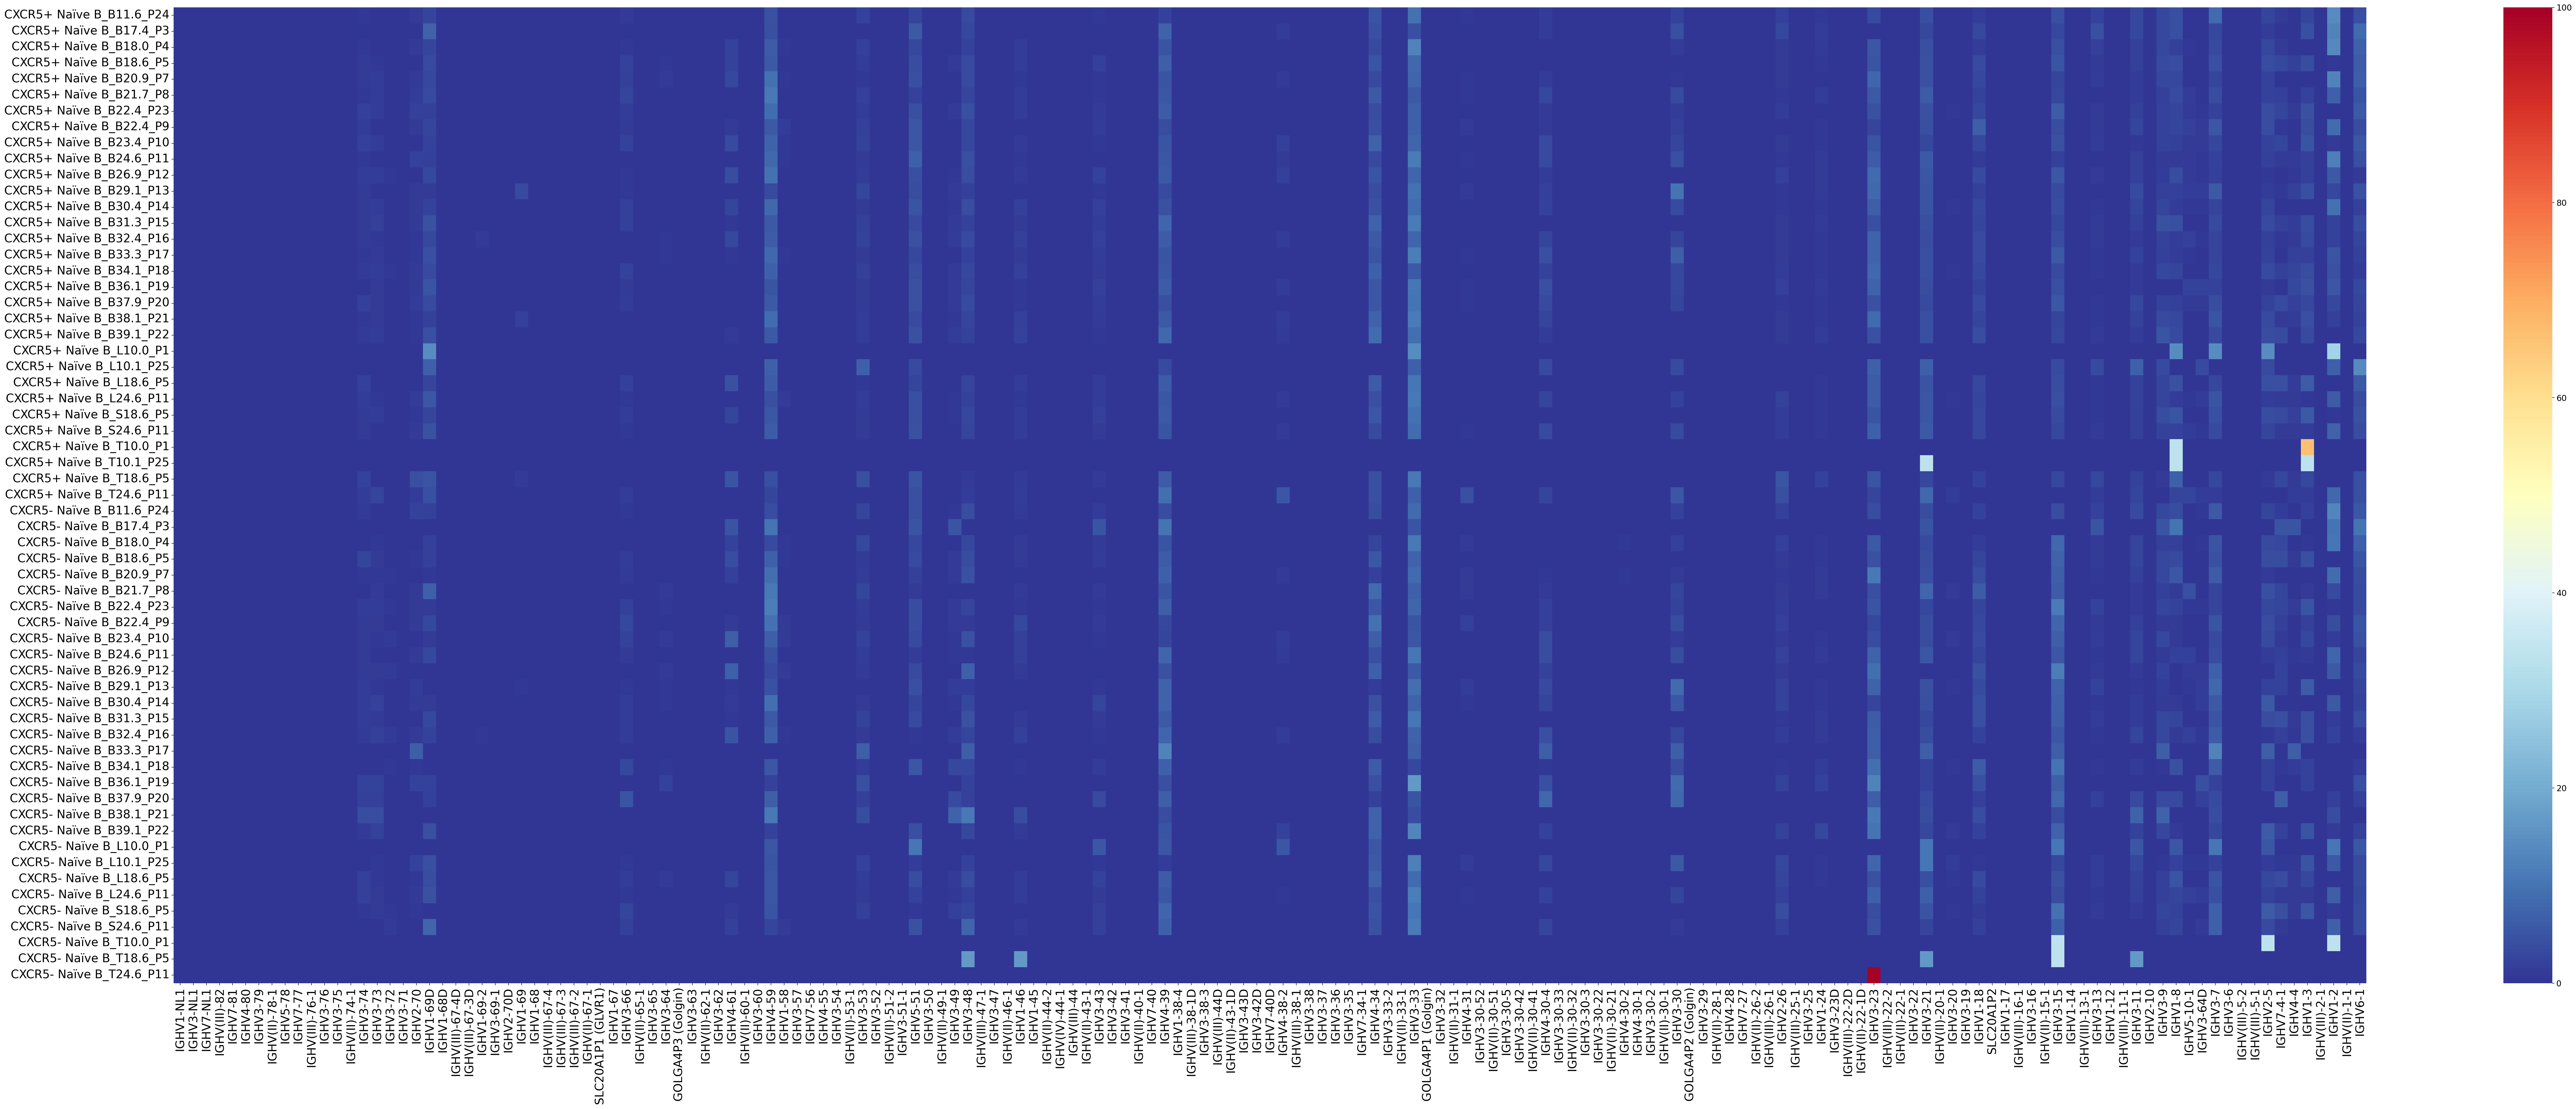

In [39]:
BCRH_chain, BCRHfigL = calculate_BCRVDJ_heatmap(adata_noT12, IGHlistvalues ,input_IR='IR_VDJ_1_v_call',input_cell_type=['CXCR5- Naïve B','CXCR5+ Naïve B'])

In [40]:
BCRH_chainlong=BCRH_chain.reset_index().rename(columns={'index': 'Sample'}).melt(id_vars=['Sample'])
BCRH_chainlong

Sample   variable     value
0      CXCR5+ Naïve B_B11.6_P24  IGHV1-NL1       0.0
1       CXCR5+ Naïve B_B17.4_P3  IGHV1-NL1       0.0
2       CXCR5+ Naïve B_B18.0_P4  IGHV1-NL1       0.0
3       CXCR5+ Naïve B_B18.6_P5  IGHV1-NL1       0.0
4       CXCR5+ Naïve B_B20.9_P7  IGHV1-NL1       0.0
...                         ...        ...       ...
10182   CXCR5- Naïve B_S18.6_P5    IGHV6-1  3.208556
10183  CXCR5- Naïve B_S24.6_P11    IGHV6-1  3.448276
10184   CXCR5- Naïve B_T10.0_P1    IGHV6-1       0.0
10185   CXCR5- Naïve B_T18.6_P5    IGHV6-1       0.0
10186  CXCR5- Naïve B_T24.6_P11    IGHV6-1       0.0

[10187 rows x 3 columns]

In [41]:
# %%R
# library(ggplot2)
# library(dplyr)
# library(RColorBrewer )
# BCRH=BCRH_chainlong
# BCRH$variable<-factor(BCRH$variable,level=IGHlistvalues)

# library(dplyr)

# # BCRH$Sample<-factor(BCRH$Sample,level=rev(sort(unique(BCRH$Sample))))
# # BCRH$Sample
# BCRH_chainlong$Sample[1:10]

/data1/maolp/mamba/envs/Pyscan/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "value". Fall back to string conversion. The error is: <class 'float'>
  warnings.warn('Error while trying to convert '


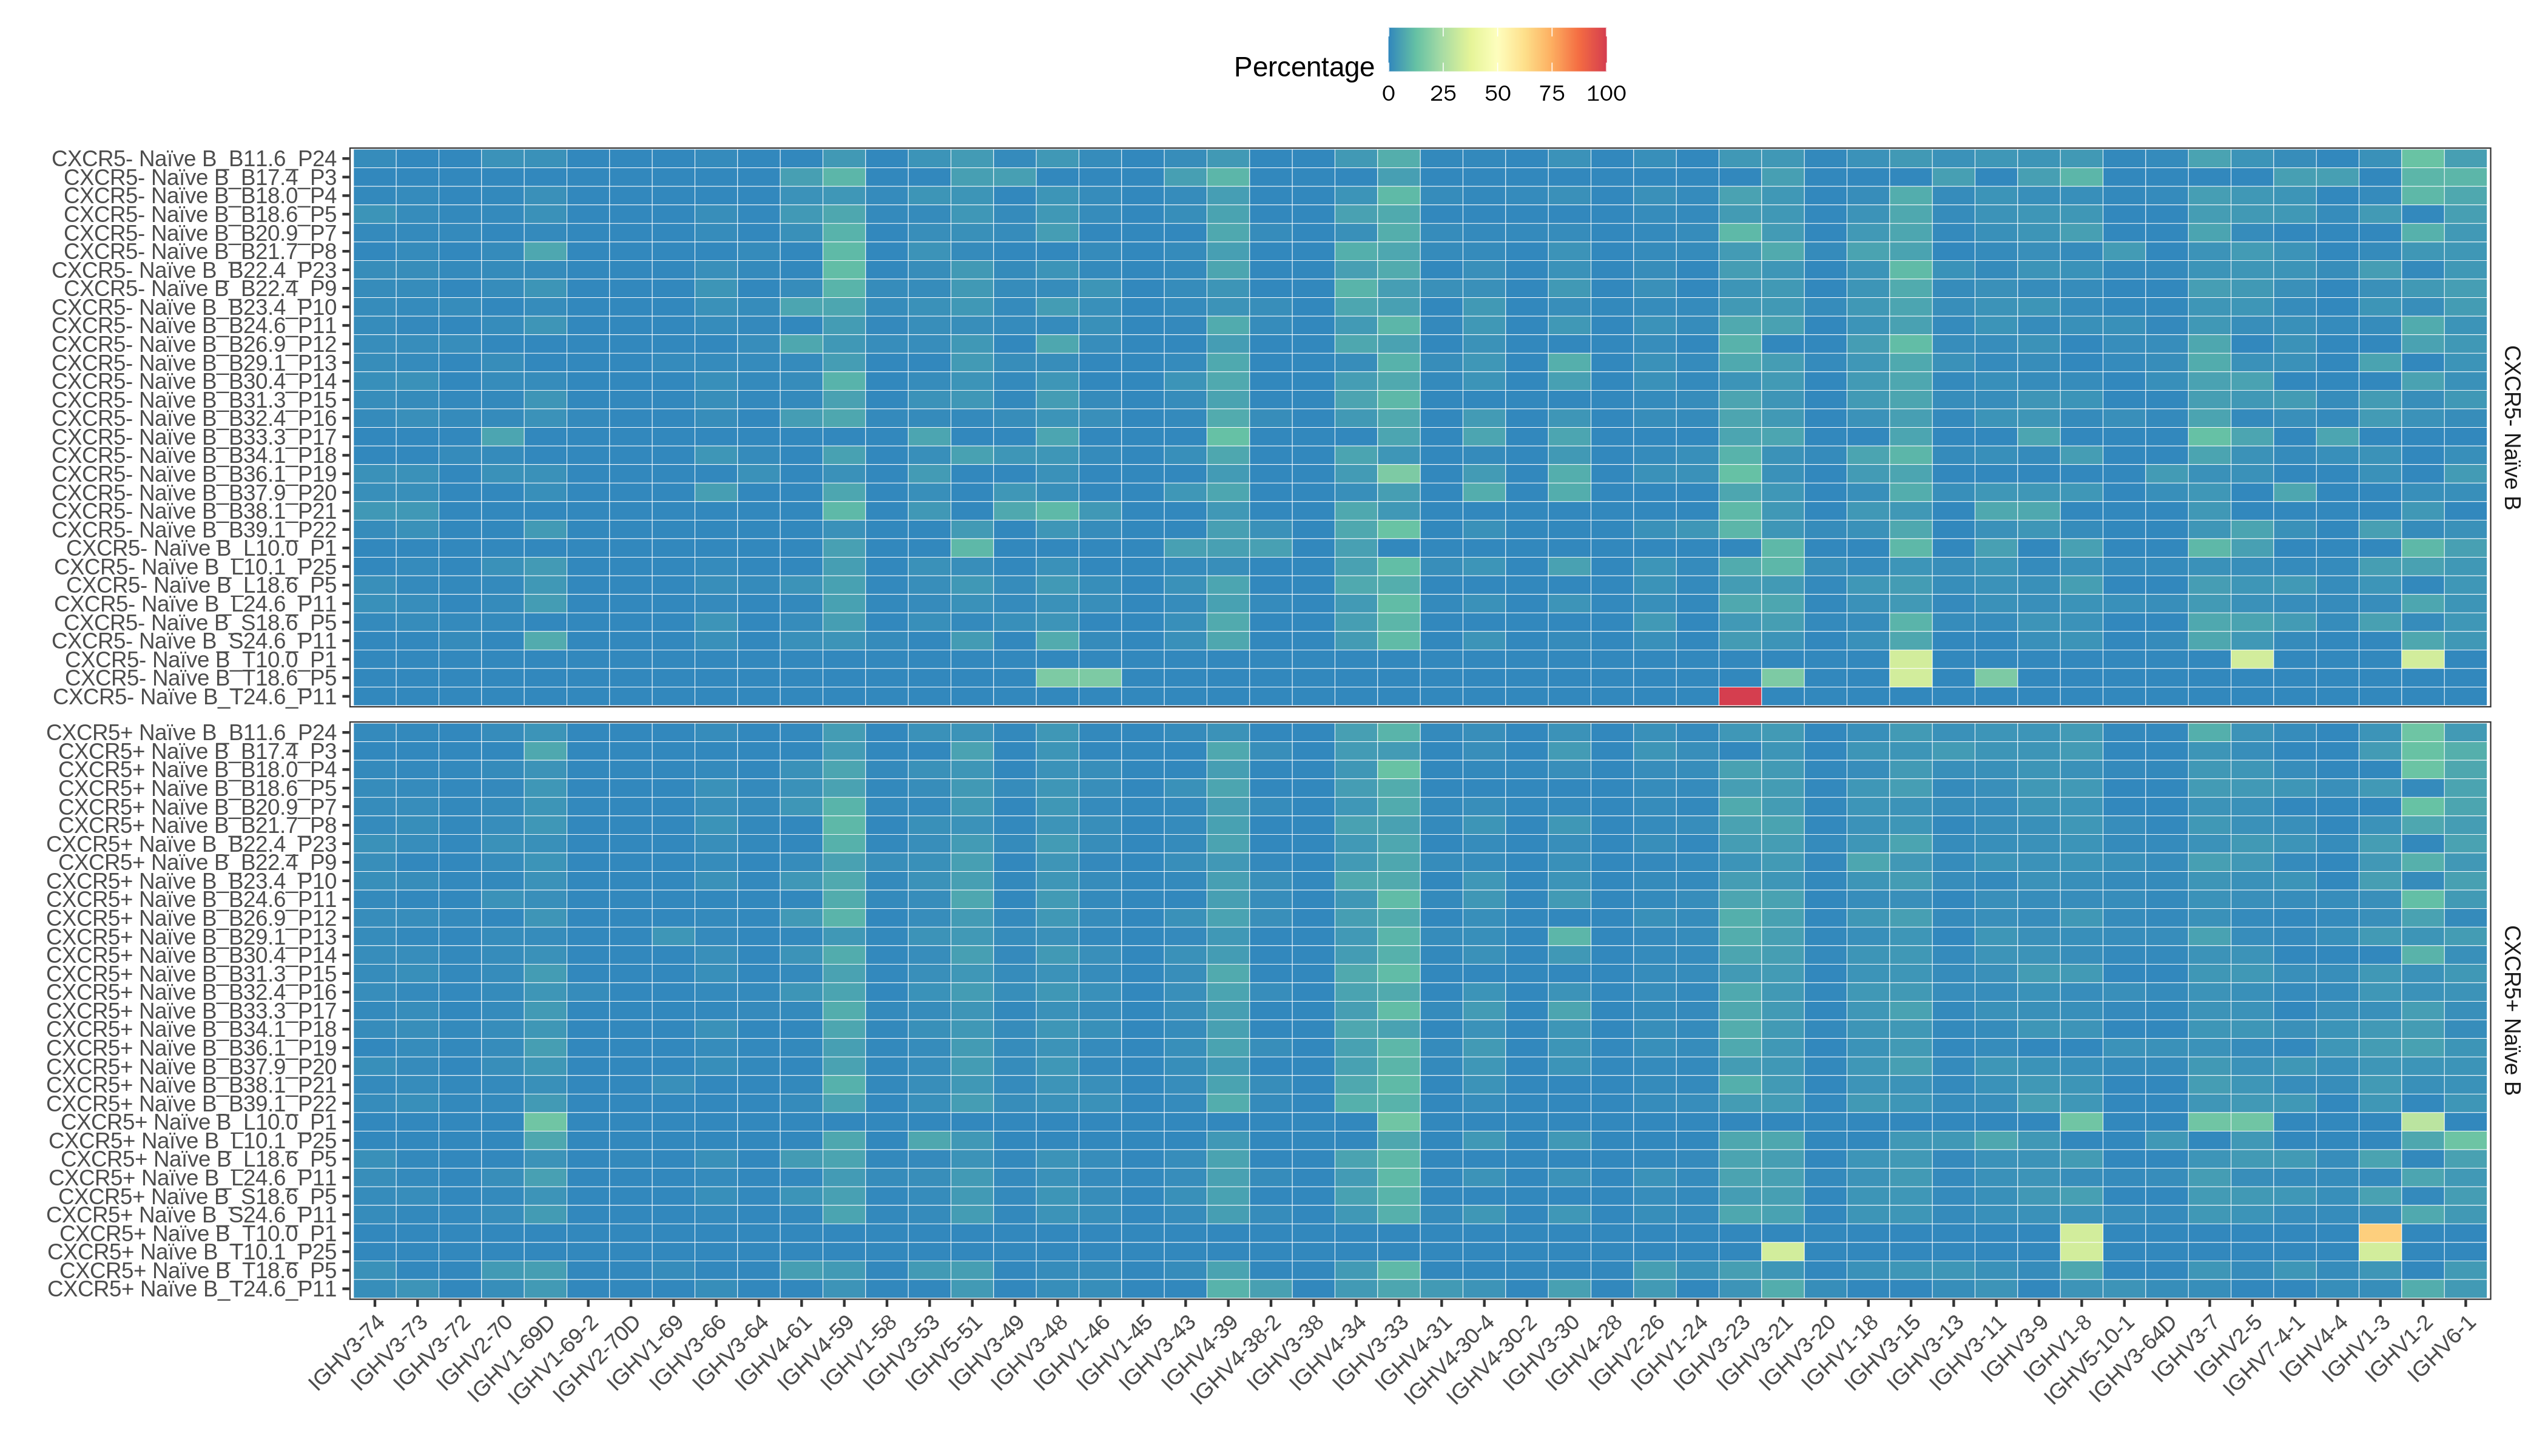

In [42]:
%%R  -w 4200 -h 2400 -r 300 -i BCRH_chainlong -i IGHlistvalues 
library(ggplot2)
library(dplyr)
library(RColorBrewer )
library(ComplexHeatmap)
BCRH=BCRH_chainlong
BCRH$variable<-factor(BCRH$variable,level=IGHlistvalues)

library(dplyr)



split_BCRH<- strsplit(BCRH$Sample, "_")


BCRH$CellType <- sapply(split_BCRH, "[", 1)
BCRH$AdjusteID<- sapply(split_BCRH, "[", 2)

BCRH$Organ <- substr(BCRH$AdjusteID, 1, 1)
BCRH$Sample<-factor(BCRH$Sample,level=rev(sort(unique(BCRH$Sample))))
BCRH2 <- BCRH %>% group_by(variable) %>% filter(sum(as.numeric(value) )!= 0) %>%ungroup()


BCRH2$CellType_Organ <- paste(BCRH2$CellType, BCRH2$Organ, sep = "_")



BCRH_ph=ggplot(BCRH2 )+ 

# geom_tile(aes(x=Last_cell_type_num,y= factor(AdjustedID,level=rev(levels(factor(CD45_result$AdjustedID)))),color='white'))+
geom_tile(aes(x=variable,y= Sample,fill=as.numeric(value)),color='white')+
# facet_grid(CellType~ Organ, space = "free", scales = "free", switch = "y")+
# facet_wrap(~ CellType_Organ, scales = "free", ncol = 2) +
facet_grid( CellType~. , scales = "free", space = "free") +theme_bw()+
 theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
#      axis.text.y = element_blank(),
#          axis.ticks.y = element_blank(),
     panel.grid.major = element_blank(),
    strip.background = element_blank(),
    strip.placement = "",  # place facet labels outside the plot area
    strip.text.y.left = element_text(angle = 90),legend.position='top') +labs(fill = "Percentage")+

  xlab('') + ylab('')+scale_fill_gradientn(colours = rev(colorRampPalette(brewer.pal(9, "Spectral"))(100)))
# scale_fill_gradientn(colours = rev(colorRampPalette(brewer.pal(9, "Spectral"))(100)))

BCRH_ph

In [43]:
# %%R
# wide_data <- spread(BCRH2, variable, value)
# rownames(wide_data) <- wide_data$Sample
# wide_data$Sample <- NULL 
# dim(wide_data)
# wide_data[,-c(1:5)]


In [44]:
# %%R
# annotations <- BCRH2 %>% 
#   select(Sample, CellType, Organ) %>% 
#   distinct() %>% 
#   column_to_rownames("Sample")
# dim(annotations )
# mat <- as.matrix(wide_data[,-c(1:5)])
# dim(mat)

In [45]:
BCRH_chainlong.Sample.unique()

array(['CXCR5+ Naïve B_B11.6_P24', 'CXCR5+ Naïve B_B17.4_P3',
       'CXCR5+ Naïve B_B18.0_P4', 'CXCR5+ Naïve B_B18.6_P5',
       'CXCR5+ Naïve B_B20.9_P7', 'CXCR5+ Naïve B_B21.7_P8',
       'CXCR5+ Naïve B_B22.4_P23', 'CXCR5+ Naïve B_B22.4_P9',
       'CXCR5+ Naïve B_B23.4_P10', 'CXCR5+ Naïve B_B24.6_P11',
       'CXCR5+ Naïve B_B26.9_P12', 'CXCR5+ Naïve B_B29.1_P13',
       'CXCR5+ Naïve B_B30.4_P14', 'CXCR5+ Naïve B_B31.3_P15',
       'CXCR5+ Naïve B_B32.4_P16', 'CXCR5+ Naïve B_B33.3_P17',
       'CXCR5+ Naïve B_B34.1_P18', 'CXCR5+ Naïve B_B36.1_P19',
       'CXCR5+ Naïve B_B37.9_P20', 'CXCR5+ Naïve B_B38.1_P21',
       'CXCR5+ Naïve B_B39.1_P22', 'CXCR5+ Naïve B_L10.0_P1',
       'CXCR5+ Naïve B_L10.1_P25', 'CXCR5+ Naïve B_L18.6_P5',
       'CXCR5+ Naïve B_L24.6_P11', 'CXCR5+ Naïve B_S18.6_P5',
       'CXCR5+ Naïve B_S24.6_P11', 'CXCR5+ Naïve B_T10.0_P1',
       'CXCR5+ Naïve B_T10.1_P25', 'CXCR5+ Naïve B_T18.6_P5',
       'CXCR5+ Naïve B_T24.6_P11', 'CXCR5- Naïve B_B11.6_P24',
   

In [46]:
%%R
Sampleseq=c('CXCR5+ Naïve B_B13.6_P24', 'CXCR5+ Naïve B_B19.4_P3',
       'CXCR5+ Naïve B_B20.0_P4', 'CXCR5+ Naïve B_B20.6_P5',
       'CXCR5+ Naïve B_B22.9_P7', 'CXCR5+ Naïve B_B23.7_P8',
       'CXCR5+ Naïve B_B24.4_P23', 'CXCR5+ Naïve B_B24.4_P9',
       'CXCR5+ Naïve B_B25.4_P10', 'CXCR5+ Naïve B_B26.6_P11',
       'CXCR5+ Naïve B_B28.9_P12', 'CXCR5+ Naïve B_B31.1_P13',
       'CXCR5+ Naïve B_B32.4_P14', 'CXCR5+ Naïve B_B33.3_P15',
       'CXCR5+ Naïve B_B34.4_P16', 'CXCR5+ Naïve B_B35.3_P17',
       'CXCR5+ Naïve B_B36.1_P18', 'CXCR5+ Naïve B_B38.1_P19',
       'CXCR5+ Naïve B_B39.9_P20', 'CXCR5+ Naïve B_B40.1_P21',
       'CXCR5+ Naïve B_B41.1_P22', 'CXCR5+ Naïve B_L12.0_P1',
       'CXCR5+ Naïve B_L12.1_P25', 'CXCR5+ Naïve B_L20.6_P5',
       'CXCR5+ Naïve B_L26.6_P11','CXCR5+ Naïve B_T20.6_P5',
       'CXCR5+ Naïve B_T26.6_P11','CXCR5+ Naïve B_S20.6_P5',
       'CXCR5+ Naïve B_S26.6_P11')

In [47]:
%%R
max(as.numeric(BCRH_chainlong$value))

[1] 100


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


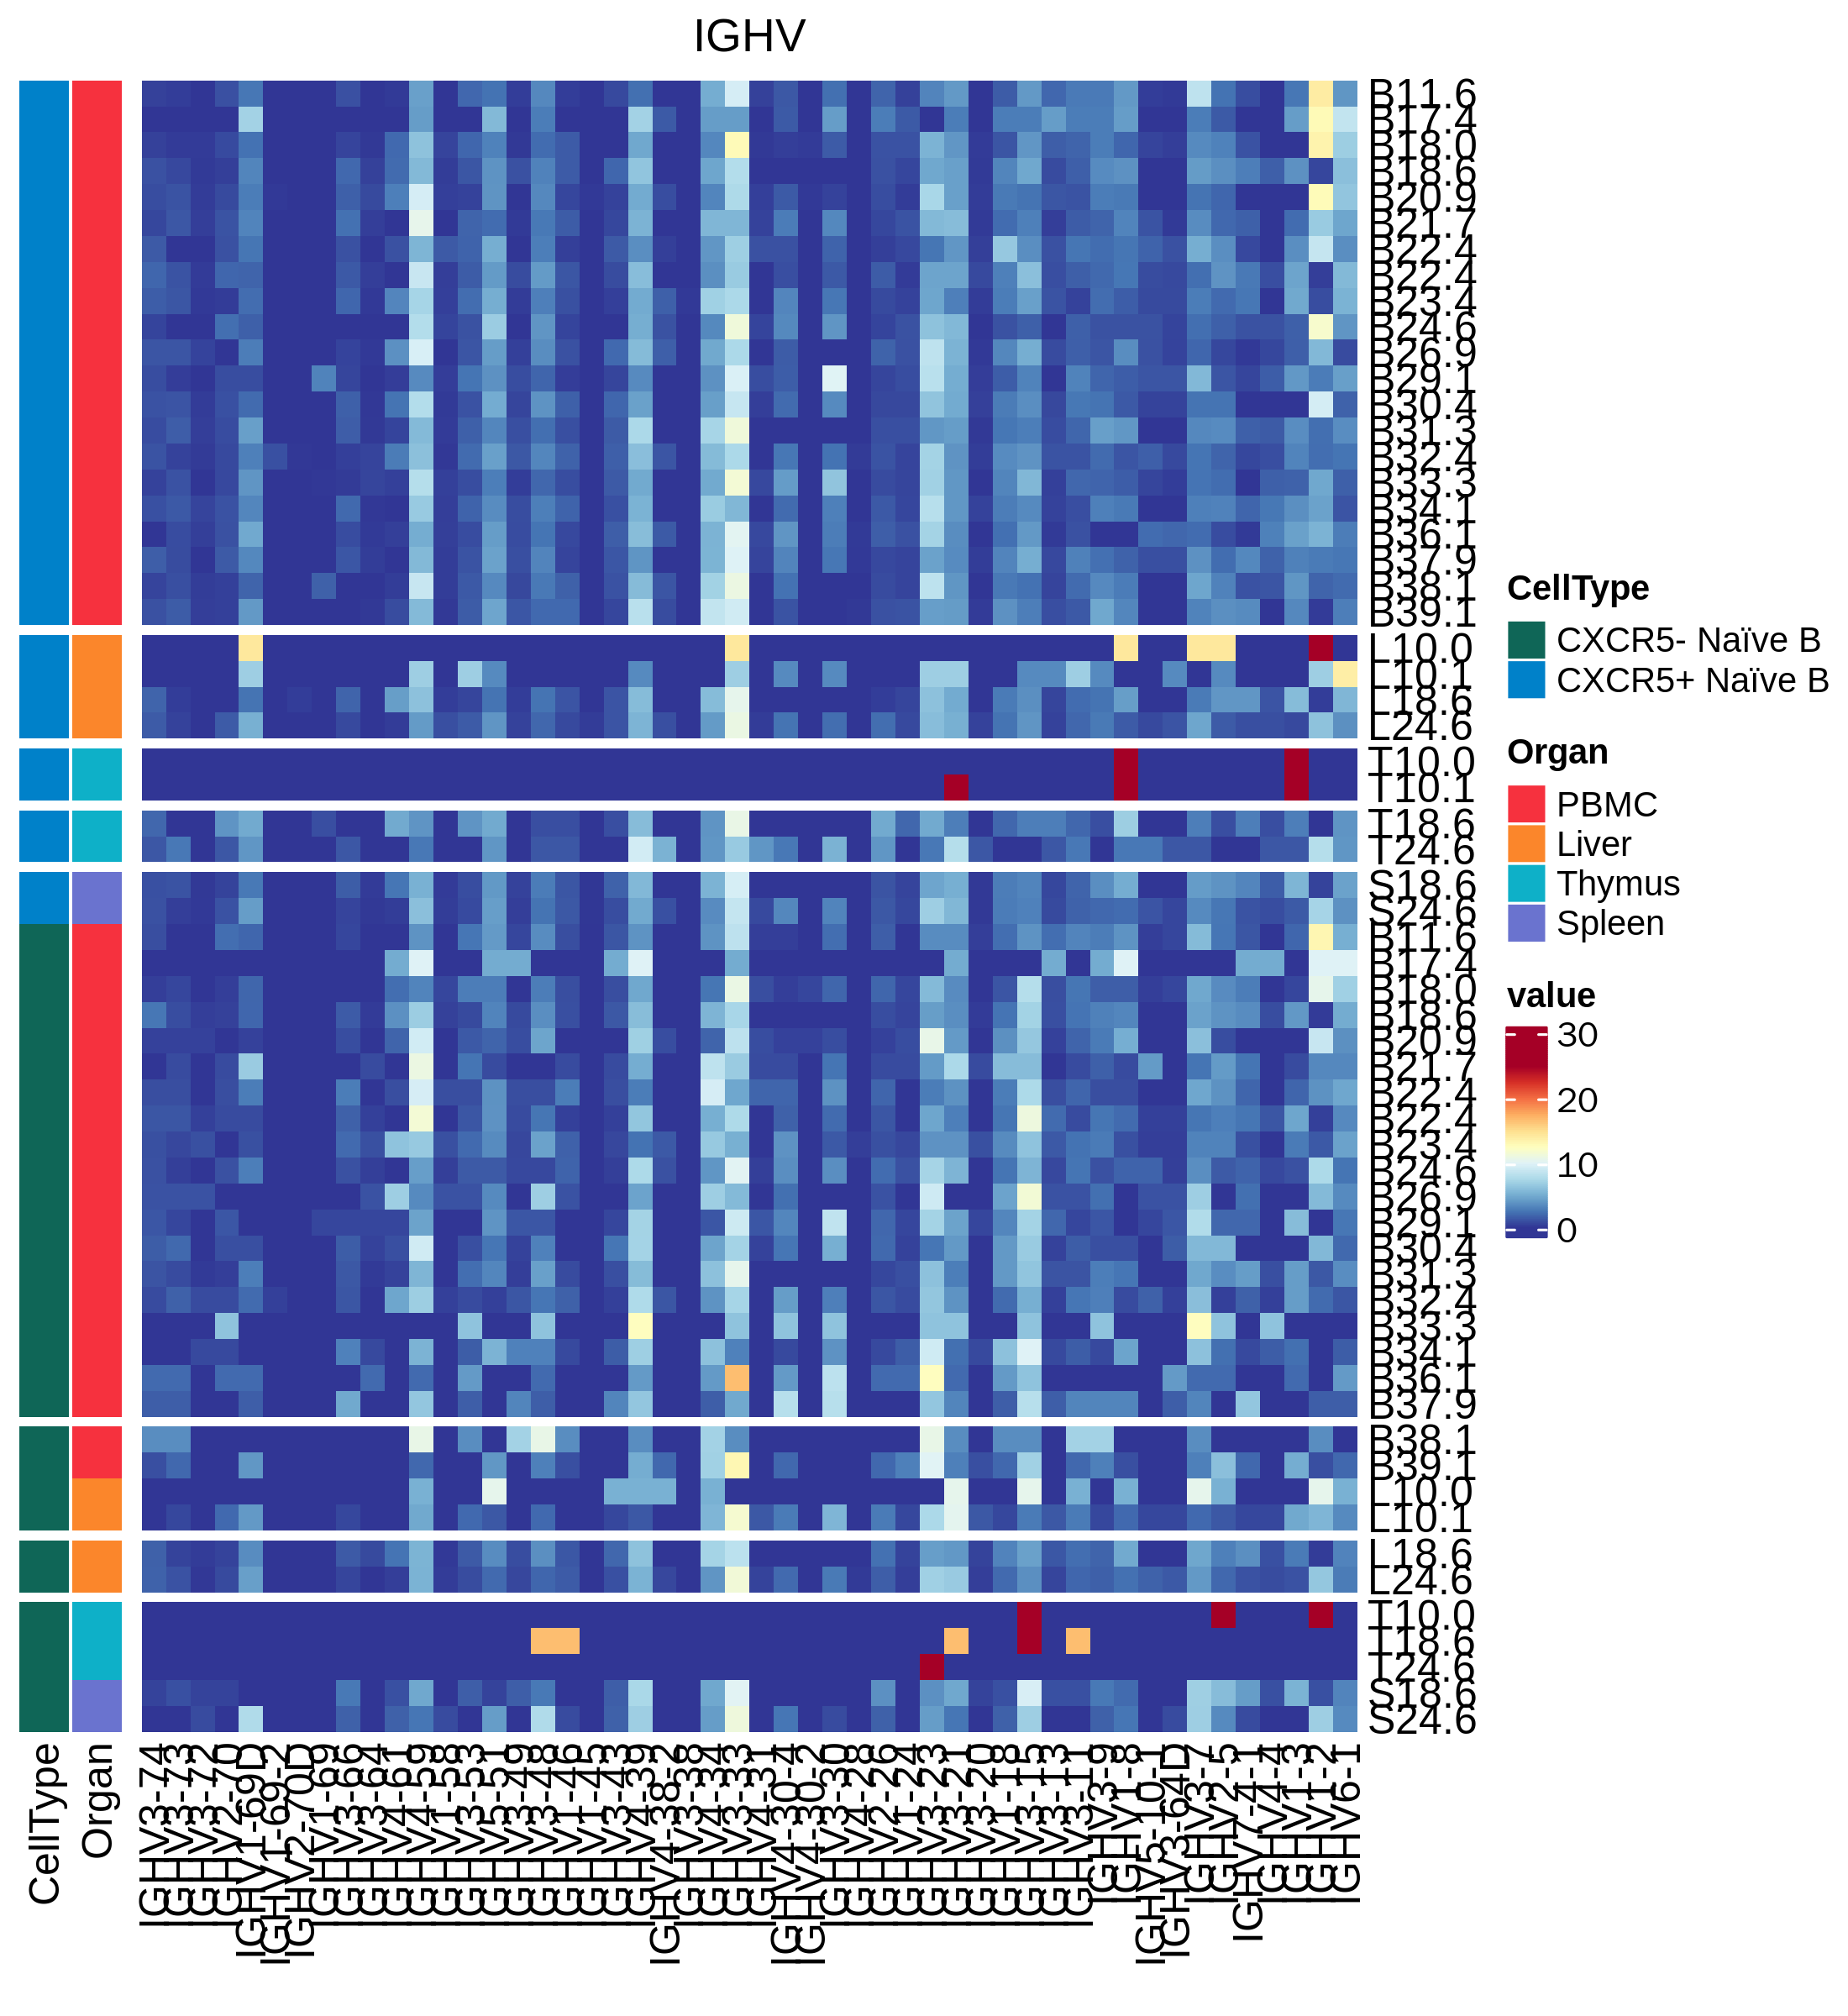

In [48]:
%%R  -w 2200 -h 2400 -r 300 -i BCRH_chainlong -i IGHlistvalues 

BCRTR_heatmap <- function(BCRH_chainlong, IGHlistvalues,titlename='IGHV') {
  library(tidyverse)
  library(scales)
  library(ggplot2)
  library(dplyr)
  library(RColorBrewer)
  library(ComplexHeatmap)
  
  BCRH = BCRH_chainlong
  BCRH$variable <- factor(BCRH$variable, level = IGHlistvalues)

  split_BCRH <- strsplit(BCRH$Sample, "_")

  BCRH$CellType <- sapply(split_BCRH, "[", 1)
  BCRH$AdjusteID <- sapply(split_BCRH, "[", 2)

  BCRH$Organ <- substr(BCRH$AdjusteID, 1, 1)
  BCRH$Sample <- factor(BCRH$Sample, level = rev(sort(unique(BCRH$Sample))))

  BCRH2 <- BCRH %>% group_by(variable) %>% filter(sum(as.numeric(value)) != 0) %>% ungroup()
  
  BCRH2$CellType_Organ <- paste(BCRH2$CellType, BCRH2$Organ, sep = "_")

  wide_data <- spread(BCRH2, variable, value)
  rownames(wide_data) <- wide_data$Sample
  wide_data$Sample <- NULL 

  annotations2 <- BCRH2 %>% 
    select(Sample, CellType, Organ) %>% 
    distinct() %>% 
    column_to_rownames("Sample")

  wide_data <- wide_data %>%
    mutate(AdjustedID_num = as.numeric(str_extract(AdjusteID, "\\d+\\.\\d")))

  wide_data$Organ <- factor(wide_data$Organ, levels = c("B", "L", "T", "S"), ordered = TRUE)
  wide_data <- wide_data %>% arrange(CellType, Organ, AdjustedID_num)

  wide_data <- wide_data %>% 
    select(-AdjustedID_num)

  mat <- sapply(wide_data[,-c(1:4)], as.numeric)

  rownames(mat) <- wide_data$AdjusteID

  annotations2$Organ = factor(annotations2$Organ, levels = c("B", "L", "T", "S"), labels = c("PBMC", "Liver", "Thymus", "Spleen"), ordered = TRUE)

  sorted_annotations <- annotations2 %>%
    arrange(CellType, Organ)

  annotation_colors2 <- list(
    Organ = c(PBMC = "#F6313E", Liver = "#fb862b", SThymus = "#6a73cf", Thymus = "#0eb0c8", Spleen = "#6a73cf"),
    CellType = c('CXCR5+ Naïve B' = "#0081C9", 'CXCR5- Naïve B' = "#0f6657")
  )

  row_anno3 <- rowAnnotation(df = sorted_annotations, col = annotation_colors2)

  row_split_vector <- c(rep(1, 29), rep(2, nrow(mat) - 29))
    row_split_vector <- c(rep(1, 21), rep(2, 4),rep(3, 2),rep(4, 2),rep(5, 21),rep(6,4),rep(7,2),rep(8,nrow(mat)-21-4-2-2-21-4-2))
  BCRH_heatmap <- Heatmap(mat, 
    name = "value",
    col = rev(colorRampPalette(brewer.pal(11, "RdYlBu"))(100)),
    cluster_rows = FALSE, 
    row_title = NULL ,
    cluster_columns = FALSE,
    rect_gp = gpar(col = "white", lwd = 0.01),
    column_title = titlename,
    row_split = row_split_vector,
    show_row_names = T)

  return(list(row_anno3 , BCRH_heatmap))
}

# BCRH_chainlong$value[which(as.numeric(BCRH_chainlong$value)==30)] <- median(BCRH_chainlong$value)
BCRH_chainlong$value[which(as.numeric(BCRH_chainlong$value)>=25)] <- 25
BCRHVheatmap <- BCRTR_heatmap(BCRH_chainlong, IGHlistvalues,titlename='IGHV')
# print(heatmap)
BCRHVheatmap[[1]]+BCRHVheatmap[[2]]
# row_anno3+BCRH_heatmap

In [49]:
# BCRL_chain, BCRHfig = calculate_BCRVDJ_heatmap(adata_noT12,,input_IR='IR_VJ_1_v_call',input_cell_type=['CXCR5- Naïve B','CXCR5+ Naïve B'])

In [50]:
# subIGKV=adata.obs['v_call_B_VJ_main']
subIGKV = adata[adata.obs['v_call_B_VJ_main'].str.contains('IGKV')]

In [51]:
subIGKV

View of AnnData object with n_obs × n_vars = 16709 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2', 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_juncti

In [52]:
# subIGKV_select

In [53]:
IGKreallist

IGLK  IMGT gene order
0   IGKV1-NL1                0
1    IGKV3D-7                1
2    IGKV1D-8                2
3   IGKV1D-43                3
4   IGKV1D-42                4
..        ...              ...
72    IGKV1-5               72
73    IGKV2-4               73
74    IGKV7-3               74
75    IGKV5-2               75
76    IGKV4-1               76

[77 rows x 2 columns]

In [54]:
# IGKrealistvalues

In [55]:
# subIGKV_select.obs['Last_cell_type'].value_counts()

/tmp/ipykernel_112641/4040635362.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subIGKV_select.obs['Organ_cell_type']=subIGKV_select.obs['Last_cell_type'].astype('str')+"_"+subIGKV_select.obs['AdjustedID'].astype('str')


[Text(0, 0.5, 'CXCR5+ Naïve B_B11.6_P24'),
 Text(0, 1.5, 'CXCR5+ Naïve B_B17.4_P3'),
 Text(0, 2.5, 'CXCR5+ Naïve B_B18.0_P4'),
 Text(0, 3.5, 'CXCR5+ Naïve B_B18.6_P5'),
 Text(0, 4.5, 'CXCR5+ Naïve B_B20.9_P7'),
 Text(0, 5.5, 'CXCR5+ Naïve B_B21.7_P8'),
 Text(0, 6.5, 'CXCR5+ Naïve B_B22.4_P23'),
 Text(0, 7.5, 'CXCR5+ Naïve B_B22.4_P9'),
 Text(0, 8.5, 'CXCR5+ Naïve B_B23.4_P10'),
 Text(0, 9.5, 'CXCR5+ Naïve B_B24.6_P11'),
 Text(0, 10.5, 'CXCR5+ Naïve B_B26.9_P12'),
 Text(0, 11.5, 'CXCR5+ Naïve B_B29.1_P13'),
 Text(0, 12.5, 'CXCR5+ Naïve B_B30.4_P14'),
 Text(0, 13.5, 'CXCR5+ Naïve B_B31.3_P15'),
 Text(0, 14.5, 'CXCR5+ Naïve B_B32.4_P16'),
 Text(0, 15.5, 'CXCR5+ Naïve B_B33.3_P17'),
 Text(0, 16.5, 'CXCR5+ Naïve B_B34.1_P18'),
 Text(0, 17.5, 'CXCR5+ Naïve B_B36.1_P19'),
 Text(0, 18.5, 'CXCR5+ Naïve B_B37.9_P20'),
 Text(0, 19.5, 'CXCR5+ Naïve B_B38.1_P21'),
 Text(0, 20.5, 'CXCR5+ Naïve B_B39.1_P22'),
 Text(0, 21.5, 'CXCR5+ Naïve B_L10.0_P1'),
 Text(0, 22.5, 'CXCR5+ Naïve B_L10.1_P25'),
 Text

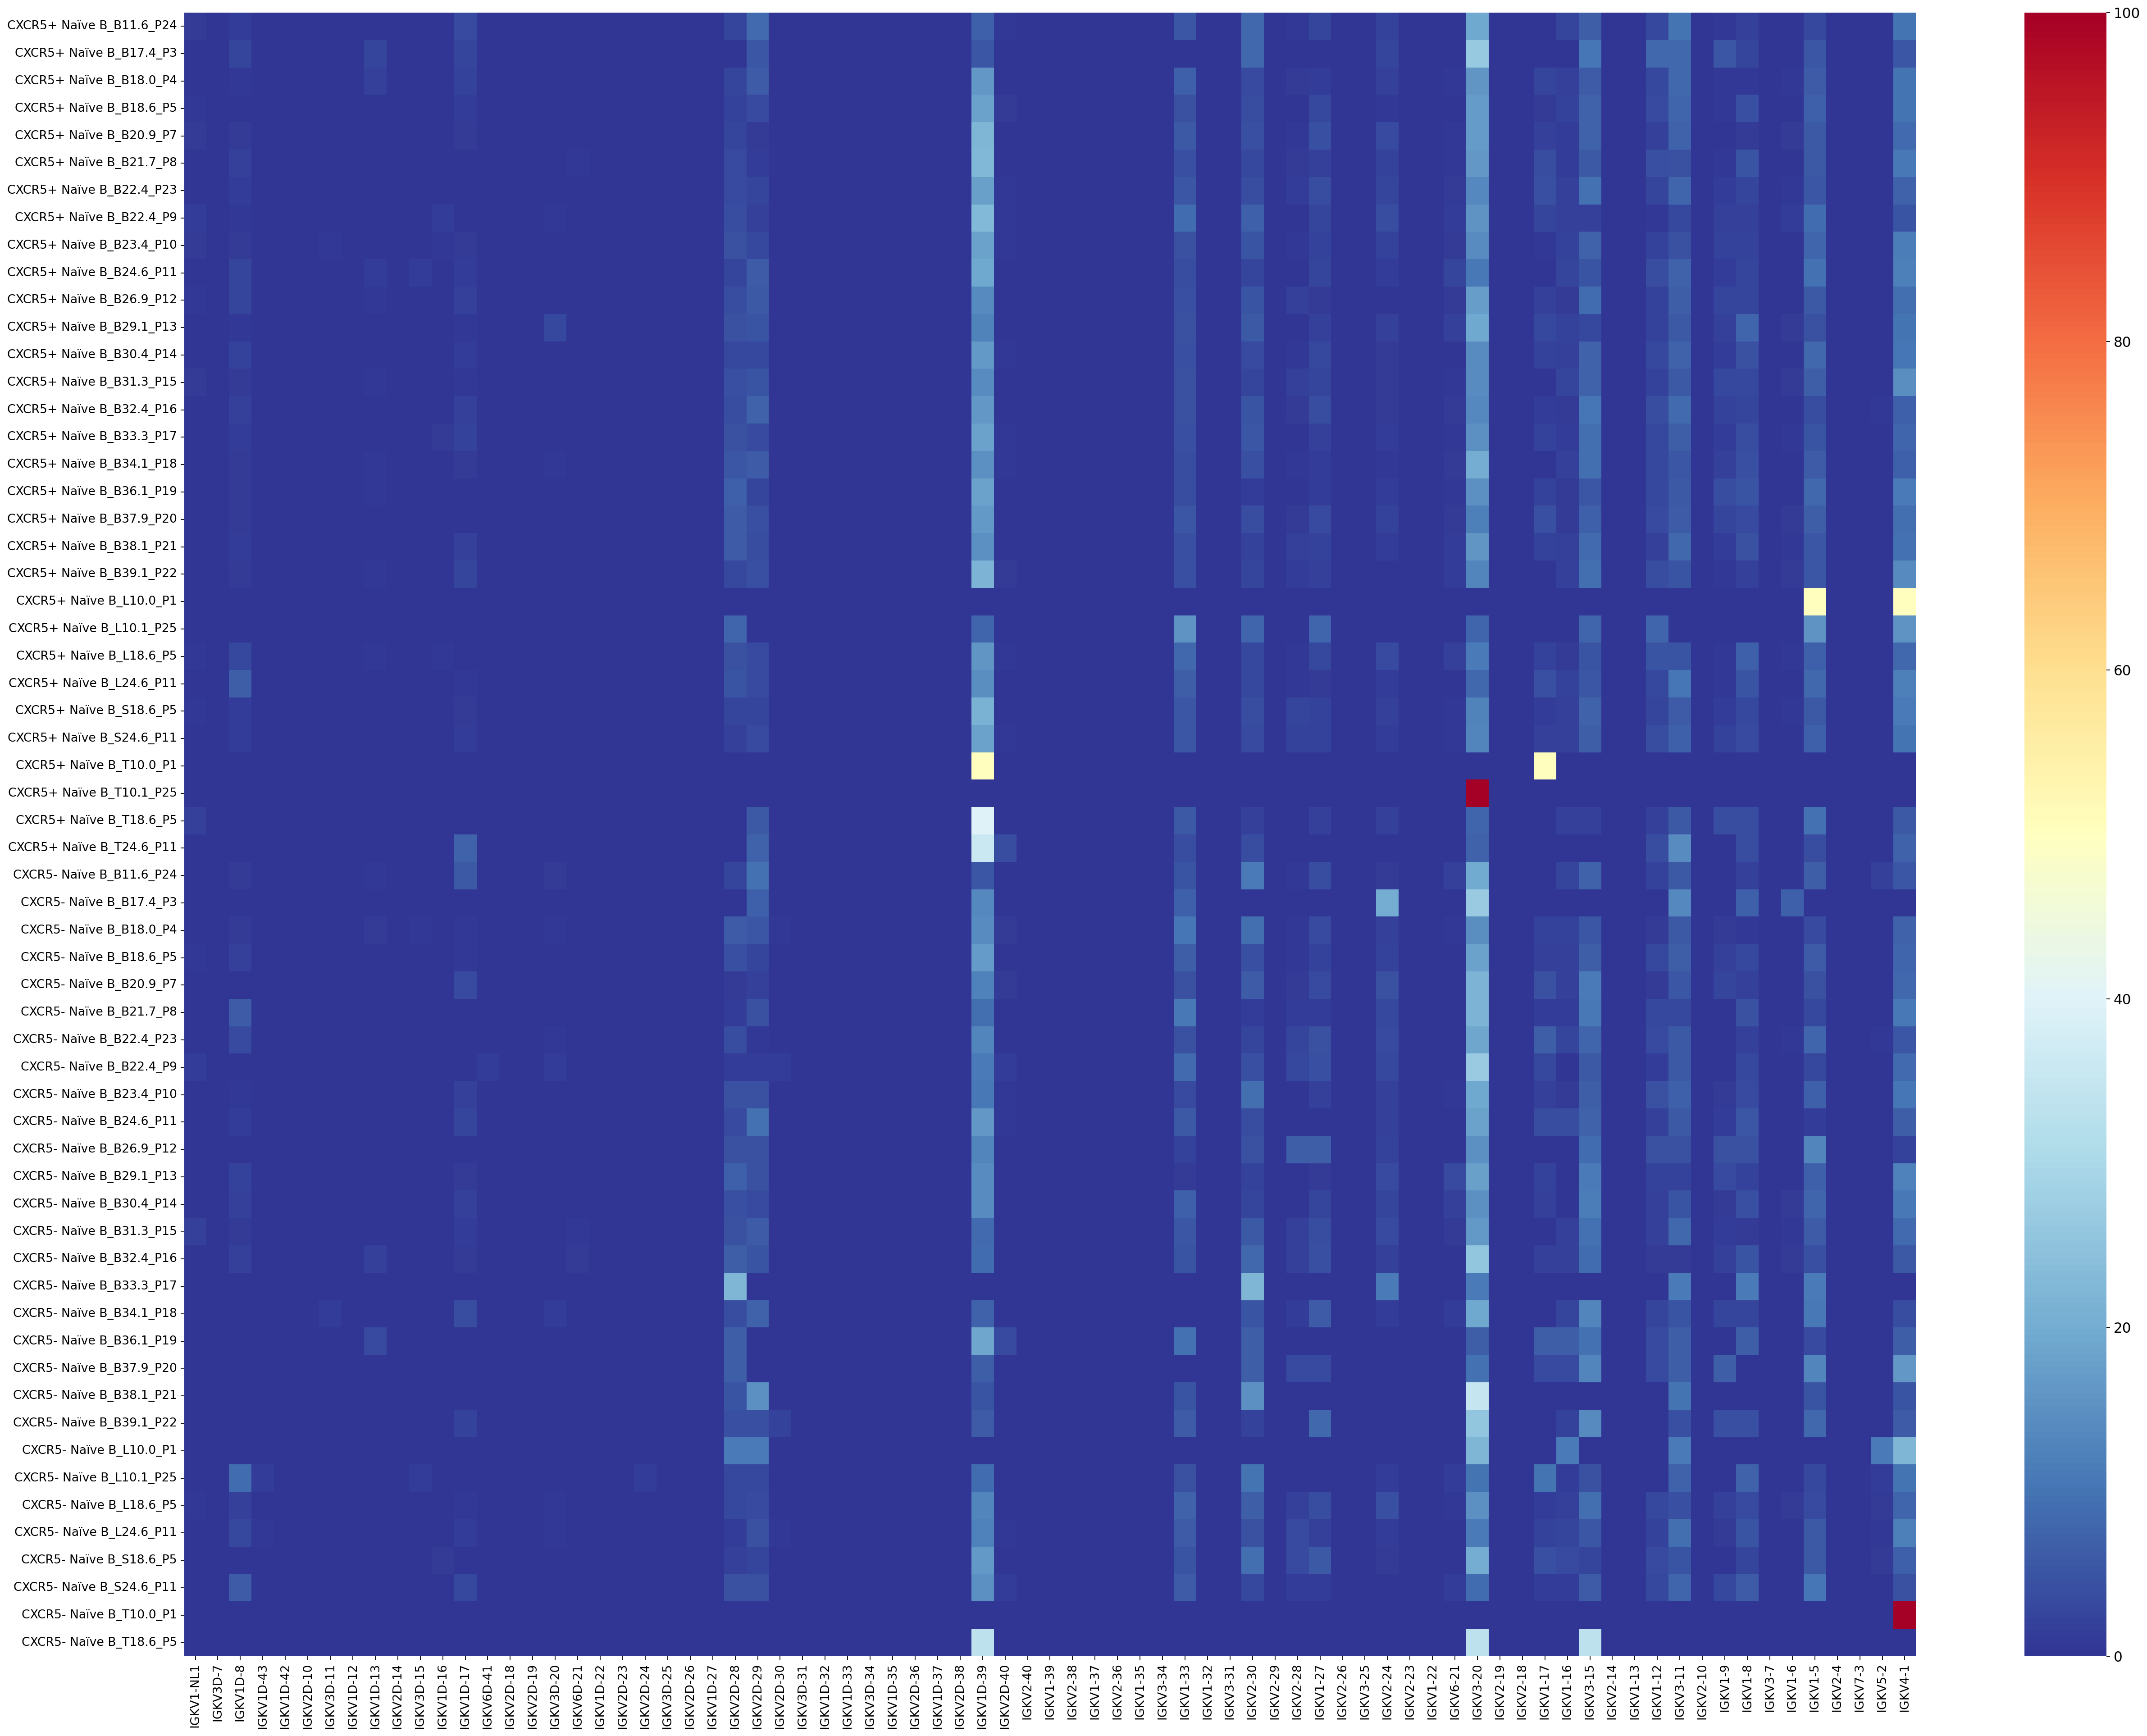

In [56]:

subIGKV_select=subIGKV[subIGKV.obs['Last_cell_type'].isin(['CXCR5- Naïve B','CXCR5+ Naïve B'])]
subIGKV_select = subIGKV_select[~subIGKV_select.obs['AdjustedID'].str.startswith('T12')]

subIGKV_select.obs['Organ_cell_type']=subIGKV_select.obs['Last_cell_type'].astype('str')+"_"+subIGKV_select.obs['AdjustedID'].astype('str')
# subIGKV_select
from collections import Counter
subBCRK_chain = None
ct_select=sorted(subIGKV_select.obs['Organ_cell_type'].unique())
Dict = {'v_call_B_VJ_main':IGKrealistvalues}

for name in list(Dict.keys()):
    df = pd.DataFrame(columns = Dict[name],  index = ct_select)
    
    for cell in df.index:
#         print(cell)
        counter = Counter(subIGKV_select.obs.loc[subIGKV_select.obs['Organ_cell_type']==cell,name])
#         print(counter)
        for chain_type in df.columns:
            df.loc[cell, chain_type]=counter[chain_type]
        
        df.loc[cell,:] = df.loc[cell,:] / np.sum(df.loc[cell,:]) * 100
    
    if subBCRK_chain is None:
        subBCRK_chain = df.copy()
    else:
        subBCRK_chain = pd.concat([subBCRK_chain, df], axis=1)
fig, ax = plt.subplots(figsize=(subBCRK_chain.shape[1]/2,subBCRK_chain.shape[0]/2))
#sb.set_theme()
uniform_data = subBCRK_chain
uniform_data=uniform_data.astype('float')
ax = sb.heatmap(uniform_data,cmap='RdYlBu_r', yticklabels=True)
_, xlabels = plt.xticks()
_, ylabels = plt.yticks()
ax.set_xticklabels(xlabels, size=12,rotation=90)
ax.set_yticklabels(ylabels, size=12,rotation=0)
# plt.savefig(fig_path+'gdsubBCRK_heatmap.pdf',bbox_inches='tight');

In [57]:
subIGLV = adata[adata.obs['v_call_B_VJ_main'].str.contains('IGLV')]
subIGLV_select=subIGLV[subIGLV.obs['Last_cell_type'].isin(['CXCR5+ Naïve B', 'CXCR5- Naïve B'])]
subIGLV.obs['Last_cell_type']
subIGLV_select

View of AnnData object with n_obs × n_vars = 14764 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2', 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_juncti

/tmp/ipykernel_112641/3565987852.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subIGLV_select.obs['Organ_cell_type']=subIGLV_select.obs['Last_cell_type'].astype('str')+"_"+subIGLV_select.obs['AdjustedID'].astype('str')


[Text(0, 0.5, 'CXCR5+ Naïve B_B11.6_P24'),
 Text(0, 1.5, 'CXCR5+ Naïve B_B17.4_P3'),
 Text(0, 2.5, 'CXCR5+ Naïve B_B18.0_P4'),
 Text(0, 3.5, 'CXCR5+ Naïve B_B18.6_P5'),
 Text(0, 4.5, 'CXCR5+ Naïve B_B20.9_P7'),
 Text(0, 5.5, 'CXCR5+ Naïve B_B21.7_P8'),
 Text(0, 6.5, 'CXCR5+ Naïve B_B22.4_P23'),
 Text(0, 7.5, 'CXCR5+ Naïve B_B22.4_P9'),
 Text(0, 8.5, 'CXCR5+ Naïve B_B23.4_P10'),
 Text(0, 9.5, 'CXCR5+ Naïve B_B24.6_P11'),
 Text(0, 10.5, 'CXCR5+ Naïve B_B26.9_P12'),
 Text(0, 11.5, 'CXCR5+ Naïve B_B29.1_P13'),
 Text(0, 12.5, 'CXCR5+ Naïve B_B30.4_P14'),
 Text(0, 13.5, 'CXCR5+ Naïve B_B31.3_P15'),
 Text(0, 14.5, 'CXCR5+ Naïve B_B32.4_P16'),
 Text(0, 15.5, 'CXCR5+ Naïve B_B33.3_P17'),
 Text(0, 16.5, 'CXCR5+ Naïve B_B34.1_P18'),
 Text(0, 17.5, 'CXCR5+ Naïve B_B36.1_P19'),
 Text(0, 18.5, 'CXCR5+ Naïve B_B37.9_P20'),
 Text(0, 19.5, 'CXCR5+ Naïve B_B38.1_P21'),
 Text(0, 20.5, 'CXCR5+ Naïve B_B39.1_P22'),
 Text(0, 21.5, 'CXCR5+ Naïve B_L10.0_P1'),
 Text(0, 22.5, 'CXCR5+ Naïve B_L10.1_P25'),
 Text

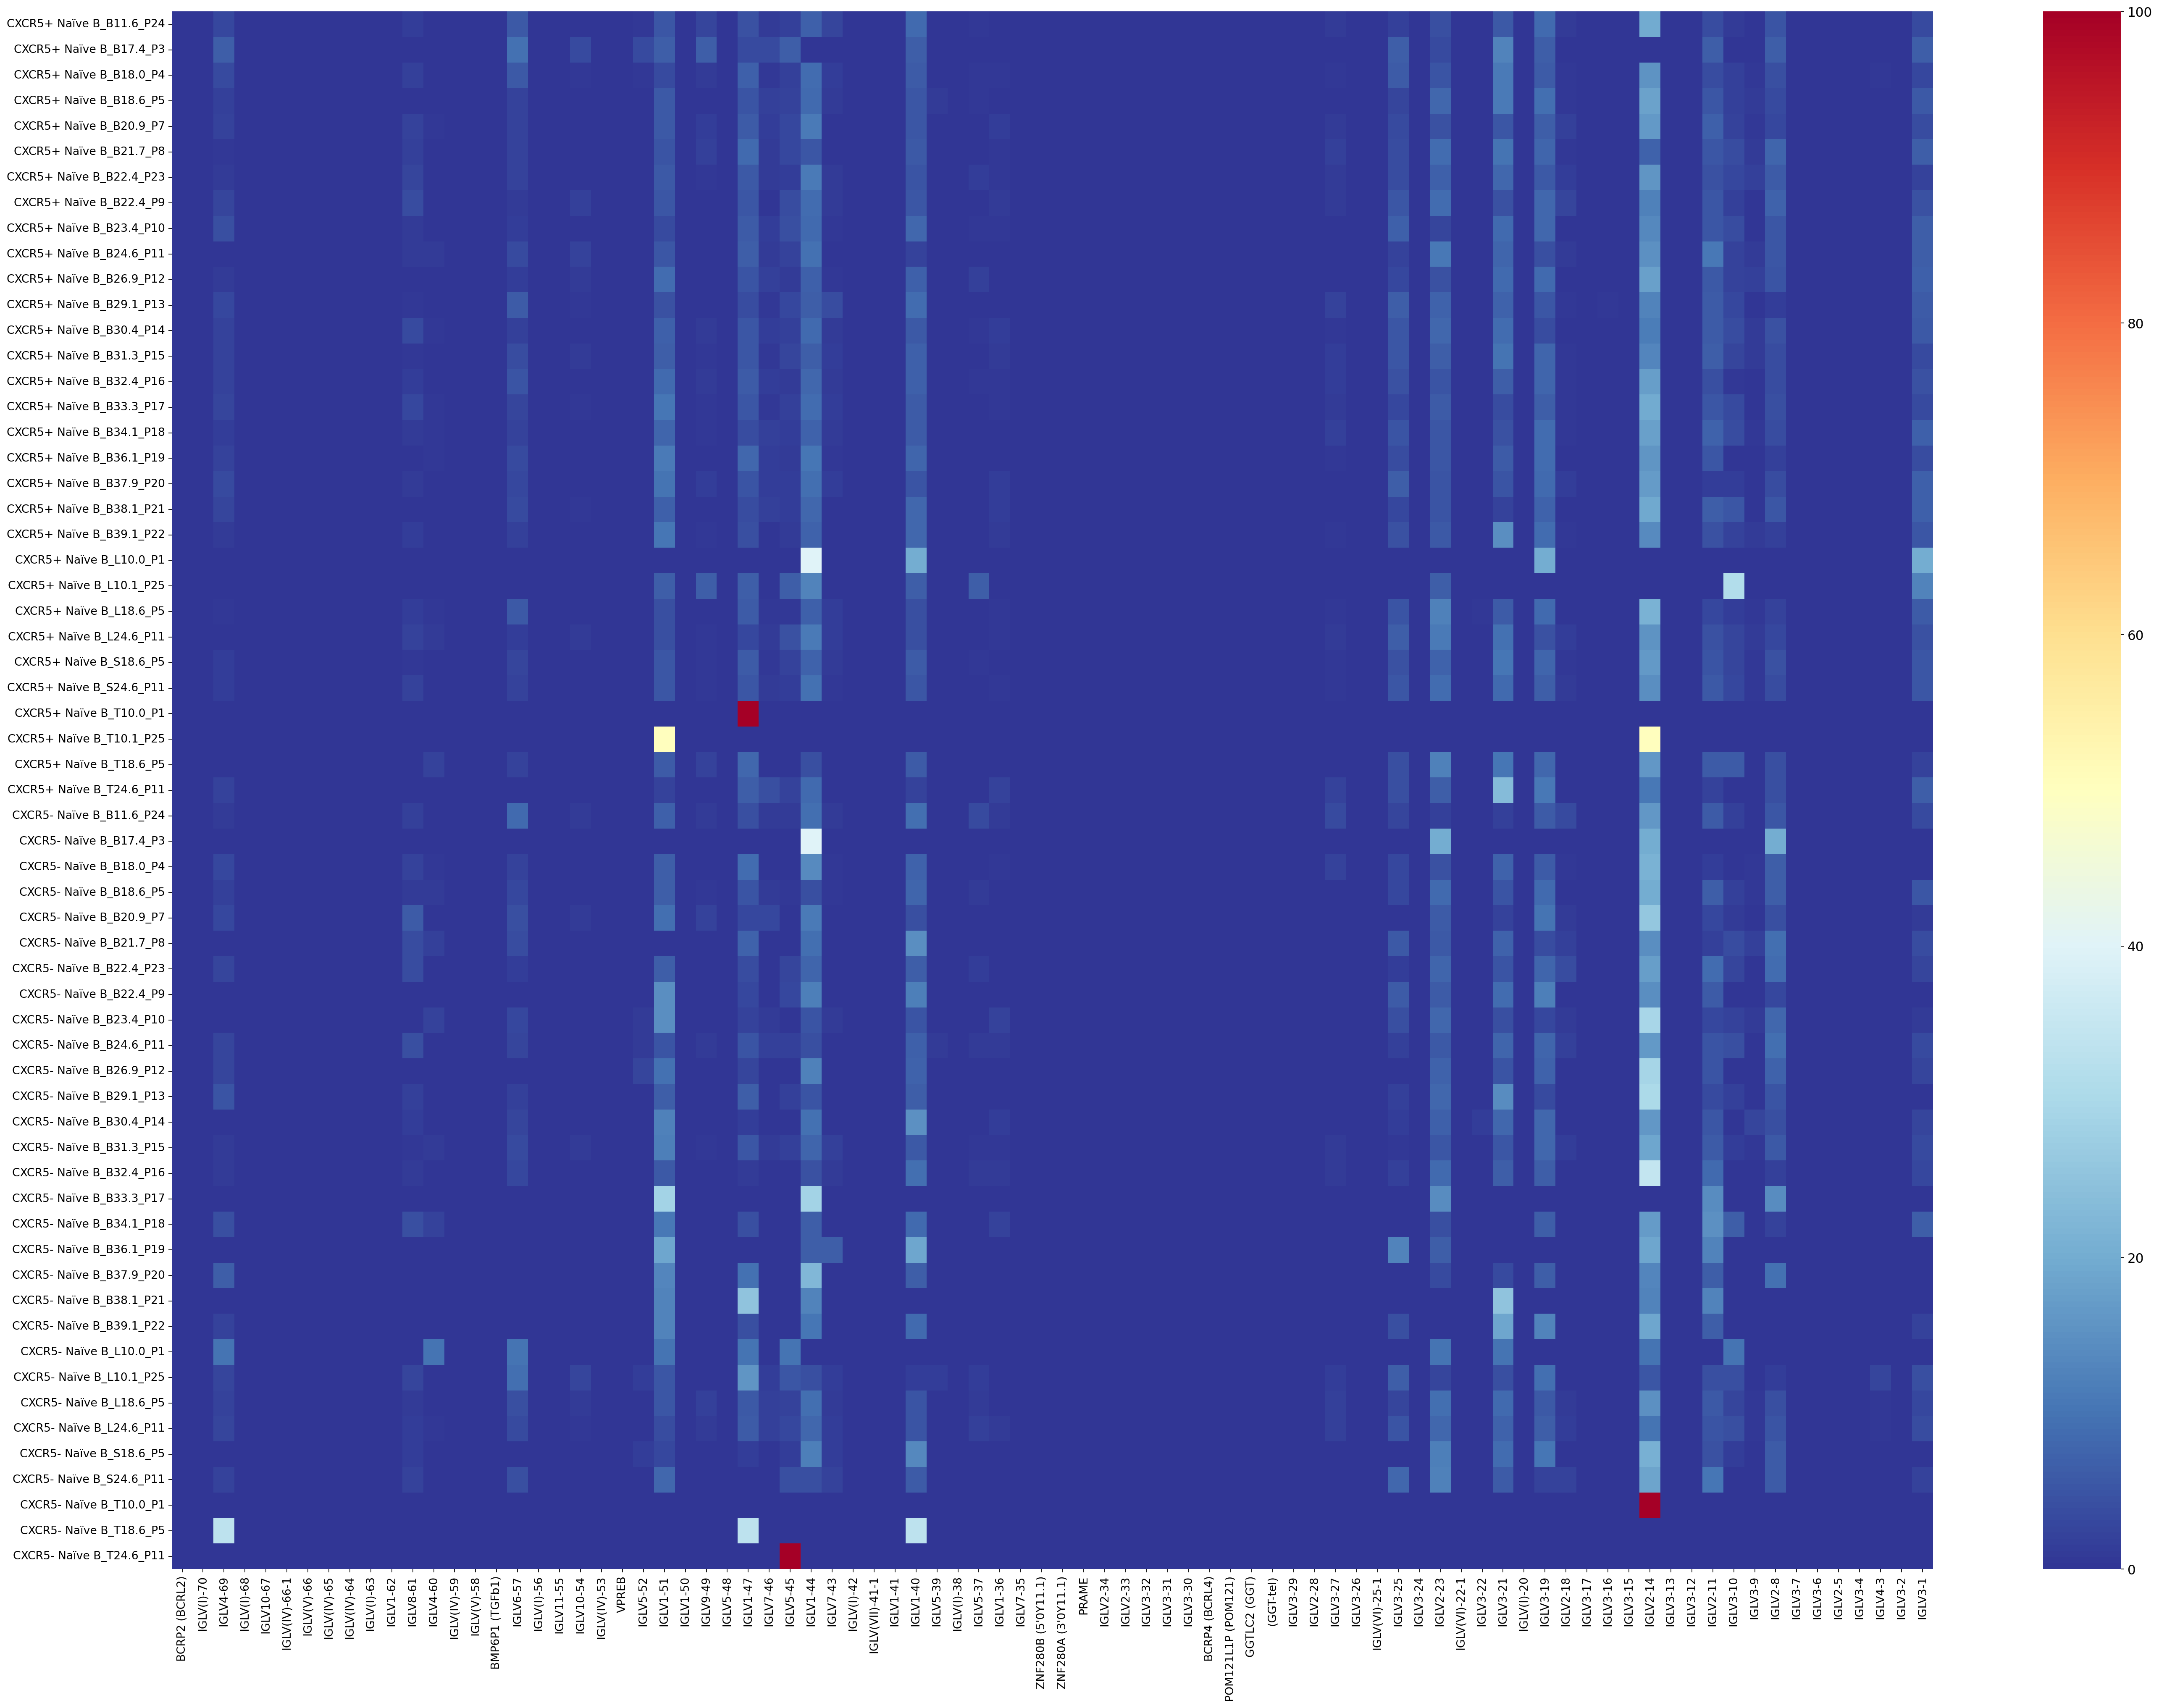

In [58]:
# subIGKV=adata.obs['v_call_B_VJ_main']
subIGLV = adata[adata.obs['v_call_B_VJ_main'].str.contains('IGLV')]
subIGLV_select=subIGLV[subIGLV.obs['Last_cell_type'].isin(['CXCR5+ Naïve B', 'CXCR5- Naïve B'])]
subIGLV_select = subIGLV_select[~subIGLV_select.obs['AdjustedID'].str.startswith('T12')]
# subIGLV_select = subIGLV_select[~subIGLV_select.obs['AdjustedID'].str.startswith('L12')]
subIGLV_select.obs['Organ_cell_type']=subIGLV_select.obs['Last_cell_type'].astype('str')+"_"+subIGLV_select.obs['AdjustedID'].astype('str')
# subIGLV_select
from collections import Counter
subBCRL_chain = None
ct_select=sorted(subIGLV_select.obs['Organ_cell_type'].unique())
Dict = {'v_call_B_VJ_main':IGLrealistvalues}

for name in list(Dict.keys()):
    df = pd.DataFrame(columns = Dict[name],  index = ct_select)
    
    for cell in df.index:
#         print(cell)
        counter = Counter(subIGLV_select.obs.loc[subIGLV_select.obs['Organ_cell_type']==cell,name])
#         print(counter)
        for chain_type in df.columns:
            df.loc[cell, chain_type]=counter[chain_type]
        
        df.loc[cell,:] = df.loc[cell,:] / np.sum(df.loc[cell,:]) * 100
    
    if subBCRL_chain is None:
        subBCRL_chain = df.copy()
    else:
        subBCRL_chain = pd.concat([subBCRL_chain, df], axis=1)
fig, ax = plt.subplots(figsize=(subBCRL_chain.shape[1]/2,subBCRL_chain.shape[0]/2))

uniform_data = subBCRL_chain
uniform_data=uniform_data.astype('float')
ax = sb.heatmap(uniform_data,cmap='RdYlBu_r', yticklabels=True)
_, xlabels = plt.xticks()
_, ylabels = plt.yticks()
ax.set_xticklabels(xlabels, size=12,rotation=90)
ax.set_yticklabels(ylabels, size=12,rotation=0)


In [59]:
 subBCRL_chain
    

BCRP2 (BCRL2) IGLV(I)-70   IGLV4-69 IGLV(I)-68  \
CXCR5+ Naïve B_B11.6_P24           0.0        0.0   2.877698        0.0   
CXCR5+ Naïve B_B17.4_P3            0.0        0.0       6.25        0.0   
CXCR5+ Naïve B_B18.0_P4            0.0        0.0   3.225806        0.0   
CXCR5+ Naïve B_B18.6_P5            0.0        0.0   1.574803        0.0   
CXCR5+ Naïve B_B20.9_P7            0.0        0.0   2.337662        0.0   
...                                ...        ...        ...        ...   
CXCR5- Naïve B_S18.6_P5            0.0        0.0        0.0        0.0   
CXCR5- Naïve B_S24.6_P11           0.0        0.0   2.040816        0.0   
CXCR5- Naïve B_T10.0_P1            0.0        0.0        0.0        0.0   
CXCR5- Naïve B_T18.6_P5            0.0        0.0  33.333333        0.0   
CXCR5- Naïve B_T24.6_P11           0.0        0.0        0.0        0.0   

                         IGLV10-67 IGLV(IV)-66-1 IGLV(V)-66 IGLV(IV)-65  \
CXCR5+ Naïve B_B11.6_P24       0.0           0.0        0.0         0.0   
CXCR5+ Naïve B_B17.4_P3        0.0           0.0        0.0         0.0   
CXCR5+ Naïve B_B18.0_P4        0.0           0.0        0.0         0.0   
CXCR5+ Naïve B_B18.6_P5        0.0           0.0        0.0         0.0   
CXCR5+ Naïve B_B20.9_P7        0.0           0.0        0.0         0.0   
...                            ...           ...        ...         ...   
CXCR5- Naïve B_S18.6_P5        0.0           0.0        0.0         0.0   
CXCR5- Naïve B_S24.6_P11       0.0           0.0        0.0         0.0   
CXCR5- Naïve B_T10.0_P1        0.0           0.0        0.0         0.0   
CXCR5- Naïve B_T18.6_P5        0.0           0.0        0.0         0.0   
CXCR5- Naïve B_T24.6_P11       0.0           0.0        0.0         0.0   

                         IGLV(IV)-64 IGLV(I)-63  ...  IGLV3-10   IGLV3-9  \
CXCR5+ Naïve B_B11.6_P24         0.0        0.0  ...  1.079137       0.0   
CXCR5+ Naïve B_B17.4_P3          0.0        0.0  ...       0.0       0.0   
CXCR5+ Naïve B_B18.0_P4          0.0        0.0  ...   1.72043  0.430108   
CXCR5+ Naïve B_B18.6_P5          0.0        0.0  ...  1.574803  0.984252   
CXCR5+ Naïve B_B20.9_P7          0.0        0.0  ...  2.077922  0.519481   
...                              ...        ...  ...       ...       ...   
CXCR5- Naïve B_S18.6_P5          0.0        0.0  ...  1.492537       0.0   
CXCR5- Naïve B_S24.6_P11         0.0        0.0  ...       0.0       0.0   
CXCR5- Naïve B_T10.0_P1          0.0        0.0  ...       0.0       0.0   
CXCR5- Naïve B_T18.6_P5          0.0        0.0  ...       0.0       0.0   
CXCR5- Naïve B_T24.6_P11         0.0        0.0  ...       0.0       0.0   

                           IGLV2-8 IGLV3-7 IGLV3-6 IGLV2-5 IGLV3-4   IGLV4-3  \
CXCR5+ Naïve B_B11.6_P24  5.035971     0.0     0.0     0.0     0.0       0.0   
CXCR5+ Naïve B_B17.4_P3       6.25     0.0     0.0     0.0     0.0       0.0   
CXCR5+ Naïve B_B18.0_P4   4.086022     0.0     0.0     0.0     0.0  0.430108   
CXCR5+ Naïve B_B18.6_P5   3.346457     0.0     0.0     0.0     0.0       0.0   
CXCR5+ Naïve B_B20.9_P7   3.116883     0.0     0.0     0.0     0.0       0.0   
...                            ...     ...     ...     ...     ...       ...   
CXCR5- Naïve B_S18.6_P5   5.970149     0.0     0.0     0.0     0.0       0.0   
CXCR5- Naïve B_S24.6_P11  6.122449     0.0     0.0     0.0     0.0       0.0   
CXCR5- Naïve B_T10.0_P1        0.0     0.0     0.0     0.0     0.0       0.0   
CXCR5- Naïve B_T18.6_P5        0.0     0.0     0.0     0.0     0.0       0.0   
CXCR5- Naïve B_T24.6_P11       0.0     0.0     0.0     0.0     0.0       0.0   

                         IGLV3-2   IGLV3-1  
CXCR5+ Naïve B_B11.6_P24     0.0   3.23741  
CXCR5+ Naïve B_B17.4_P3      0.0      6.25  
CXCR5+ Naïve B_B18.0_P4      0.0  3.010753  
CXCR5+ Naïve B_B18.6_P5      0.0  5.511811  
CXCR5+ Naïve B_B20.9_P7      0.0  3.896104  
...                          ...       ...  
CXCR5- Naïve B_S18.6_P5      0.0  

/tmp/ipykernel_112641/1635951515.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_select.obs['Organ_cell_type']=adata_select.obs['Last_cell_type'].astype('str')+"_"+adata_select.obs['AdjustedID'].astype('str')


[Text(0, 0.5, 'CXCR5+ Naïve B_B11.6_P24'),
 Text(0, 1.5, 'CXCR5+ Naïve B_B17.4_P3'),
 Text(0, 2.5, 'CXCR5+ Naïve B_B18.0_P4'),
 Text(0, 3.5, 'CXCR5+ Naïve B_B18.6_P5'),
 Text(0, 4.5, 'CXCR5+ Naïve B_B20.9_P7'),
 Text(0, 5.5, 'CXCR5+ Naïve B_B21.7_P8'),
 Text(0, 6.5, 'CXCR5+ Naïve B_B22.4_P23'),
 Text(0, 7.5, 'CXCR5+ Naïve B_B22.4_P9'),
 Text(0, 8.5, 'CXCR5+ Naïve B_B23.4_P10'),
 Text(0, 9.5, 'CXCR5+ Naïve B_B24.6_P11'),
 Text(0, 10.5, 'CXCR5+ Naïve B_B26.9_P12'),
 Text(0, 11.5, 'CXCR5+ Naïve B_B29.1_P13'),
 Text(0, 12.5, 'CXCR5+ Naïve B_B30.4_P14'),
 Text(0, 13.5, 'CXCR5+ Naïve B_B31.3_P15'),
 Text(0, 14.5, 'CXCR5+ Naïve B_B32.4_P16'),
 Text(0, 15.5, 'CXCR5+ Naïve B_B33.3_P17'),
 Text(0, 16.5, 'CXCR5+ Naïve B_B34.1_P18'),
 Text(0, 17.5, 'CXCR5+ Naïve B_B36.1_P19'),
 Text(0, 18.5, 'CXCR5+ Naïve B_B37.9_P20'),
 Text(0, 19.5, 'CXCR5+ Naïve B_B38.1_P21'),
 Text(0, 20.5, 'CXCR5+ Naïve B_B39.1_P22'),
 Text(0, 21.5, 'CXCR5+ Naïve B_L10.0_P1'),
 Text(0, 22.5, 'CXCR5+ Naïve B_L10.1_P25'),
 Text

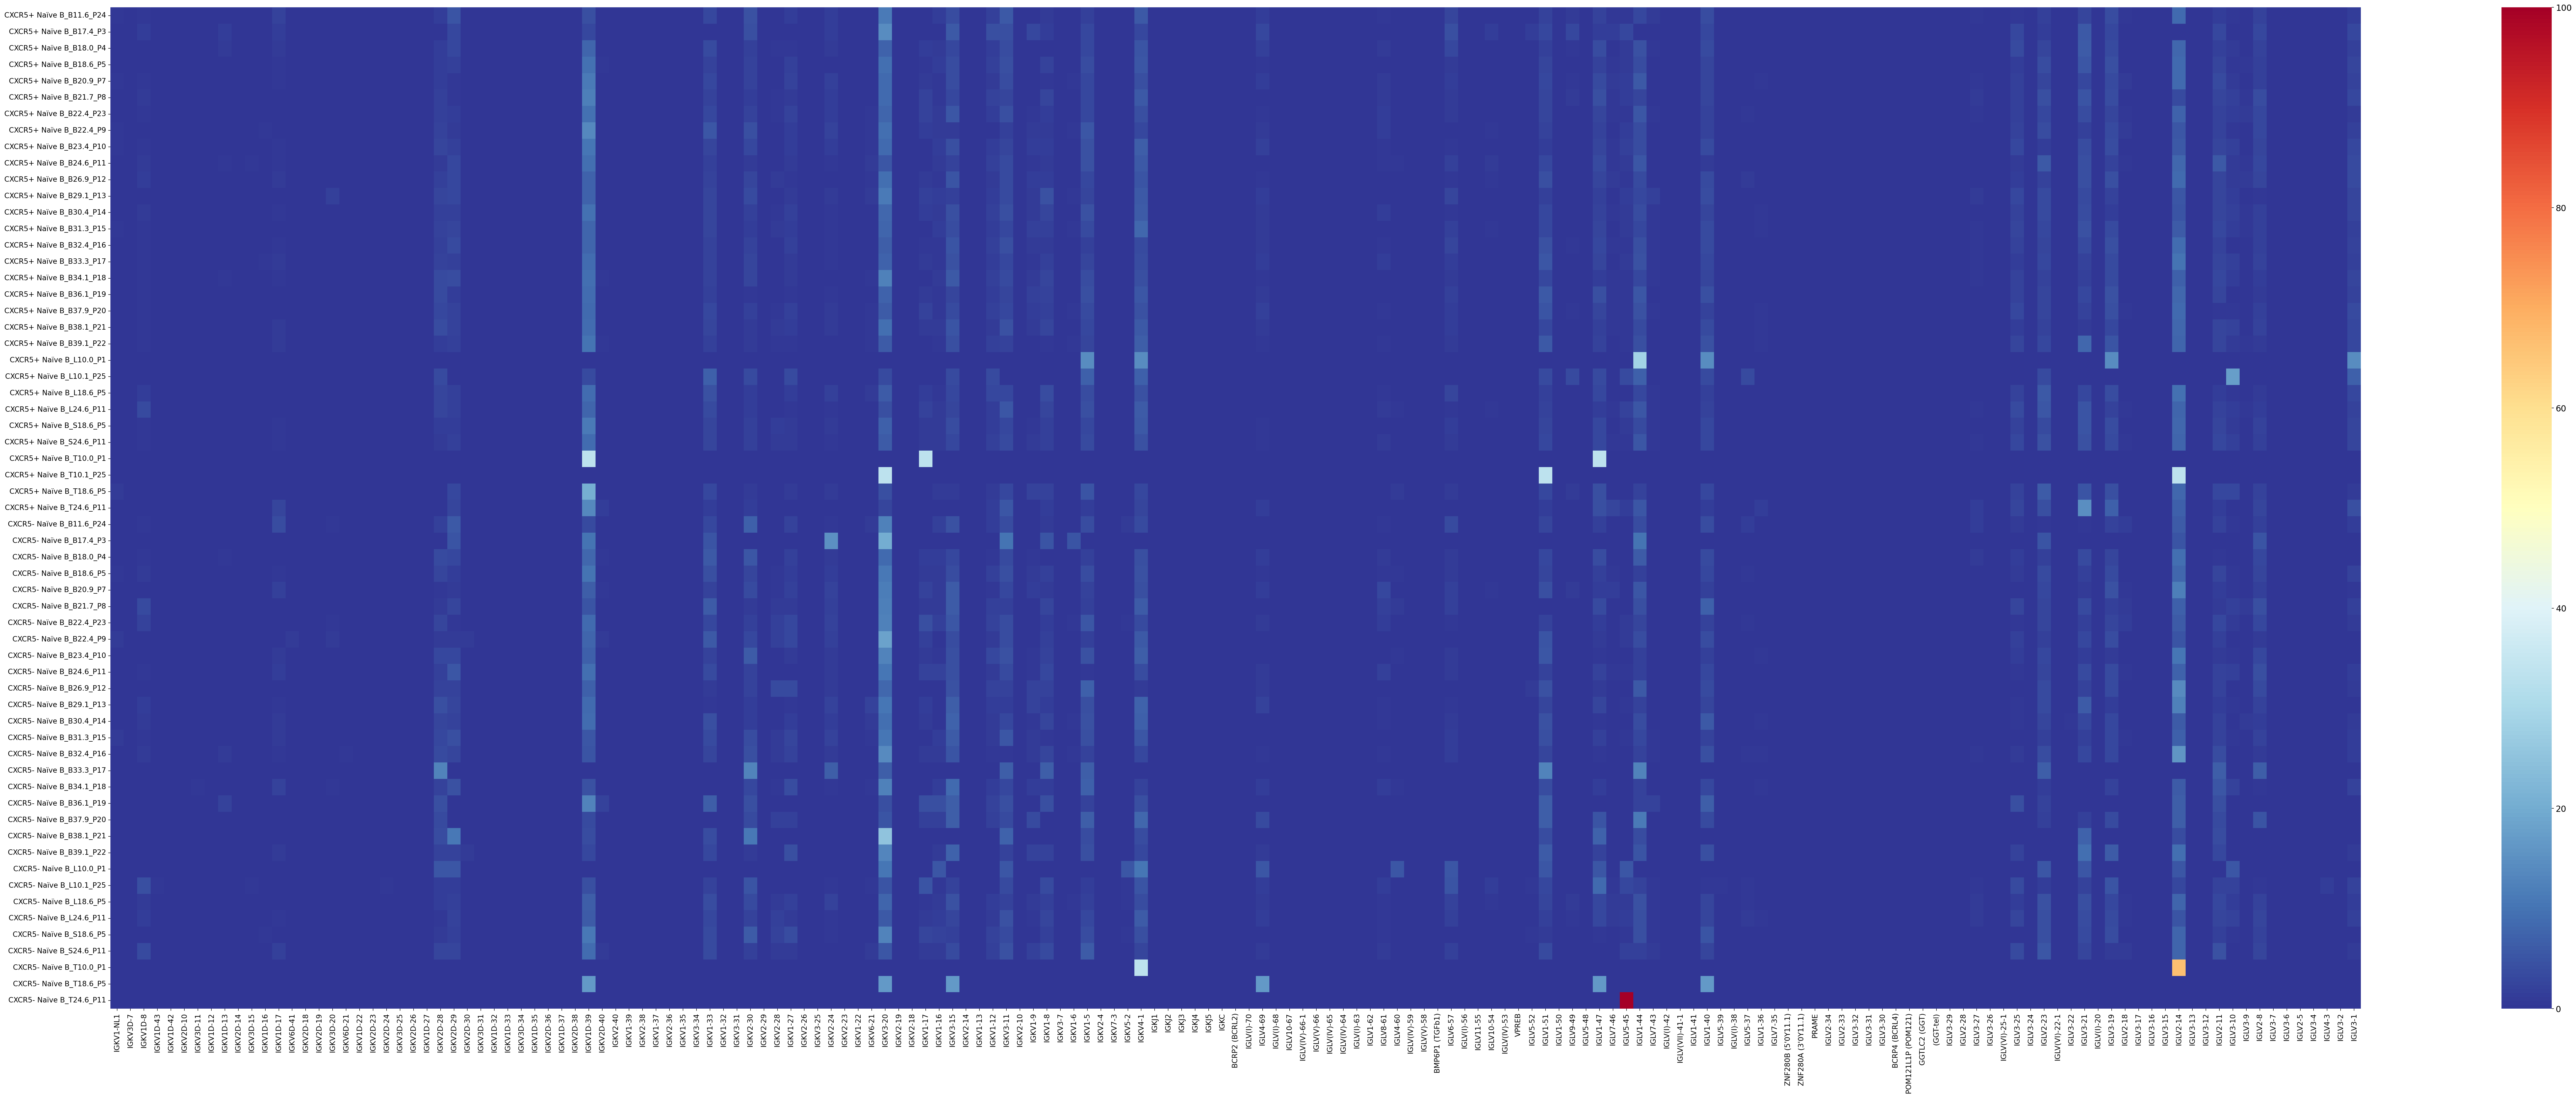

In [60]:

adata_select=adata[adata.obs['Last_cell_type'].isin(['CXCR5- Naïve B','CXCR5+ Naïve B'])]
adata_select = adata_select[~adata_select.obs['AdjustedID'].str.startswith('T12')]

adata_select.obs['Organ_cell_type']=adata_select.obs['Last_cell_type'].astype('str')+"_"+adata_select.obs['AdjustedID'].astype('str')
# adata_select
from collections import Counter
BCRL_chain = None
ct_select=sorted(adata_select.obs['Organ_cell_type'].unique())
Dict = {'v_call_B_VJ_main':IGKlistvalues}

for name in list(Dict.keys()):
    df = pd.DataFrame(columns = Dict[name],  index = ct_select)
    
    for cell in df.index:
#         print(cell)
        counter = Counter(adata_select.obs.loc[adata_select.obs['Organ_cell_type']==cell,name])
#         print(counter)
        for chain_type in df.columns:
            df.loc[cell, chain_type]=counter[chain_type]
        
        df.loc[cell,:] = df.loc[cell,:] / np.sum(df.loc[cell,:]) * 100
    
    if BCRL_chain is None:
        BCRL_chain = df.copy()
    else:
        BCRL_chain = pd.concat([BCRL_chain, df], axis=1)
fig, ax = plt.subplots(figsize=(BCRL_chain.shape[1]/2,BCRL_chain.shape[0]/2))
#sb.set_theme()
uniform_data = BCRL_chain
uniform_data=uniform_data.astype('float')
ax = sb.heatmap(uniform_data,cmap='RdYlBu_r', yticklabels=True)
_, xlabels = plt.xticks()
_, ylabels = plt.yticks()
ax.set_xticklabels(xlabels, size=12,rotation=90)
ax.set_yticklabels(ylabels, size=12,rotation=0)
# plt.savefig(fig_path+'gdBCRL_heatmap.pdf',bbox_inches='tight');

In [61]:
subIGLJV = adata[adata.obs['j_call_B_VJ_main'].str.contains('IGLJ')]
subIGLJV 

View of AnnData object with n_obs × n_vars = 14793 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2', 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_juncti

In [62]:
# subIGLJV_select.obs[""]

/tmp/ipykernel_112641/3464525866.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subIGLJV_select.obs['Organ_cell_type']=subIGLJV_select.obs['Last_cell_type'].astype('str')+"_"+subIGLJV_select.obs['AdjustedID'].astype('str')


[Text(0, 0.5, 'CXCR5+ Naïve B_B11.6_P24'),
 Text(0, 1.5, 'CXCR5+ Naïve B_B17.4_P3'),
 Text(0, 2.5, 'CXCR5+ Naïve B_B18.0_P4'),
 Text(0, 3.5, 'CXCR5+ Naïve B_B18.6_P5'),
 Text(0, 4.5, 'CXCR5+ Naïve B_B20.9_P7'),
 Text(0, 5.5, 'CXCR5+ Naïve B_B21.7_P8'),
 Text(0, 6.5, 'CXCR5+ Naïve B_B22.4_P23'),
 Text(0, 7.5, 'CXCR5+ Naïve B_B22.4_P9'),
 Text(0, 8.5, 'CXCR5+ Naïve B_B23.4_P10'),
 Text(0, 9.5, 'CXCR5+ Naïve B_B24.6_P11'),
 Text(0, 10.5, 'CXCR5+ Naïve B_B26.9_P12'),
 Text(0, 11.5, 'CXCR5+ Naïve B_B29.1_P13'),
 Text(0, 12.5, 'CXCR5+ Naïve B_B30.4_P14'),
 Text(0, 13.5, 'CXCR5+ Naïve B_B31.3_P15'),
 Text(0, 14.5, 'CXCR5+ Naïve B_B32.4_P16'),
 Text(0, 15.5, 'CXCR5+ Naïve B_B33.3_P17'),
 Text(0, 16.5, 'CXCR5+ Naïve B_B34.1_P18'),
 Text(0, 17.5, 'CXCR5+ Naïve B_B36.1_P19'),
 Text(0, 18.5, 'CXCR5+ Naïve B_B37.9_P20'),
 Text(0, 19.5, 'CXCR5+ Naïve B_B38.1_P21'),
 Text(0, 20.5, 'CXCR5+ Naïve B_B39.1_P22'),
 Text(0, 21.5, 'CXCR5+ Naïve B_L10.0_P1'),
 Text(0, 22.5, 'CXCR5+ Naïve B_L10.1_P25'),
 Text

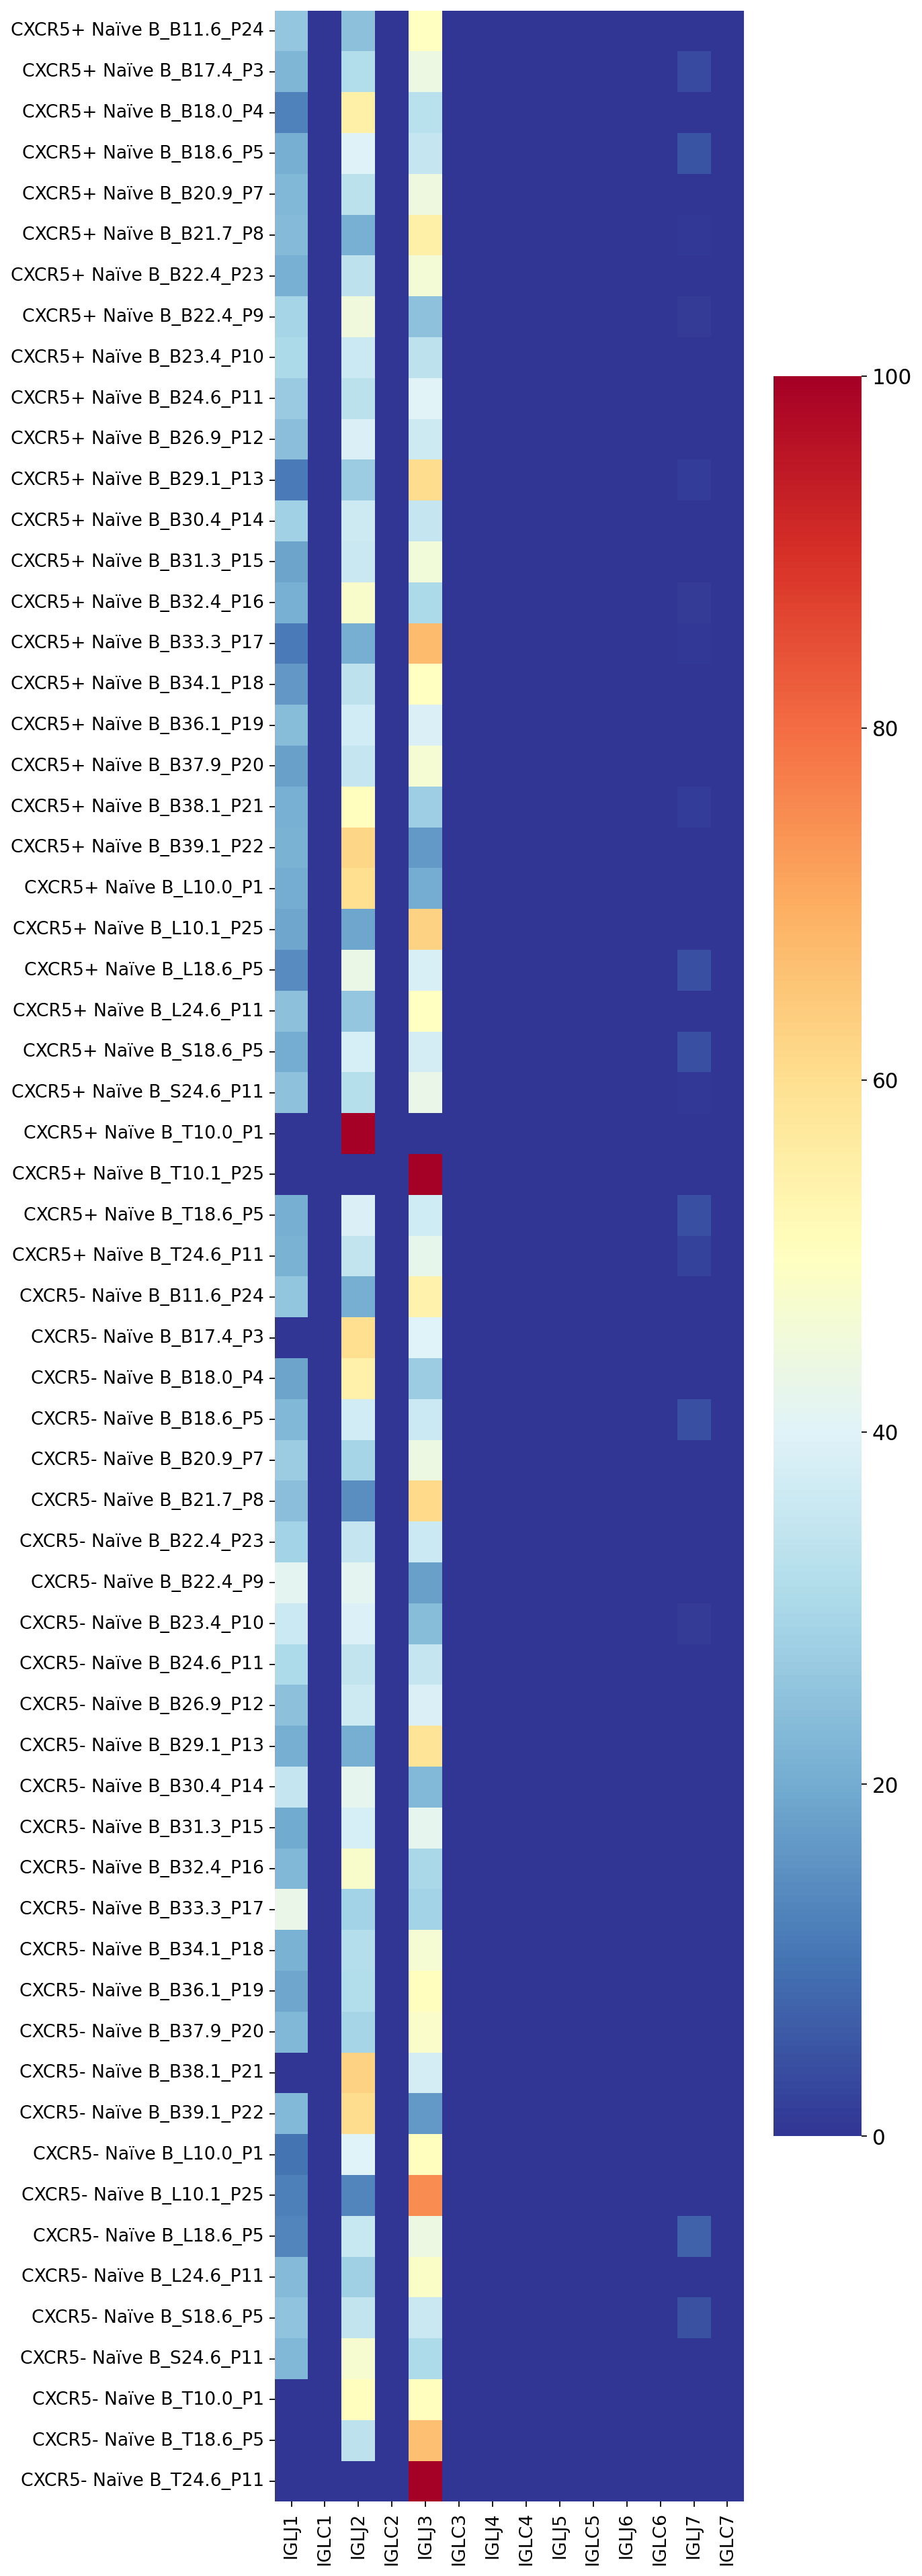

In [63]:
# subIGKV=adata.obs['v_call_B_VJ_main']
subIGLJV = adata[adata.obs['j_call_B_VJ_main'].str.contains('IGLJ')]
subIGLJV_select=subIGLJV[subIGLJV.obs['Last_cell_type'].isin(['CXCR5+ Naïve B', 'CXCR5- Naïve B'])]
subIGLJV_select = subIGLJV_select[~subIGLJV_select.obs['AdjustedID'].str.startswith('T12')]
# subIGLJV_select = subIGLJV_select[~subIGLJV_select.obs['AdjustedID'].str.startswith('L12')]
subIGLJV_select.obs['Organ_cell_type']=subIGLJV_select.obs['Last_cell_type'].astype('str')+"_"+subIGLJV_select.obs['AdjustedID'].astype('str')
# subIGLJV_select
from collections import Counter
subIGLJ_chain = None
ct_select=sorted(subIGLJV_select.obs['Organ_cell_type'].unique())
Dict = {'j_call_B_VJ_main':IGLJrealistvalues}

for name in list(Dict.keys()):
    df = pd.DataFrame(columns = Dict[name],  index = ct_select)
    
    for cell in df.index:
#         print(cell)
        counter = Counter(subIGLJV_select.obs.loc[subIGLJV_select.obs['Organ_cell_type']==cell,name])
#         print(counter)
        for chain_type in df.columns:
            df.loc[cell, chain_type]=counter[chain_type]
        
        df.loc[cell,:] = df.loc[cell,:] / np.sum(df.loc[cell,:]) * 100
    
    if subIGLJ_chain is None:
        subIGLJ_chain = df.copy()
    else:
        subIGLJ_chain = pd.concat([subIGLJ_chain, df], axis=1)
fig, ax = plt.subplots(figsize=(subIGLJ_chain.shape[1]/2,subIGLJ_chain.shape[0]/2))

uniform_data = subIGLJ_chain
uniform_data=uniform_data.astype('float')
ax = sb.heatmap(uniform_data,cmap='RdYlBu_r', yticklabels=True)
_, xlabels = plt.xticks()
_, ylabels = plt.yticks()
ax.set_xticklabels(xlabels, size=12,rotation=90)
ax.set_yticklabels(ylabels, size=12,rotation=0)


/tmp/ipykernel_112641/3143186770.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subIGKJV_select.obs['Organ_cell_type']=subIGKJV_select.obs['Last_cell_type'].astype('str')+"_"+subIGKJV_select.obs['AdjustedID'].astype('str')


[Text(0, 0.5, 'CXCR5+ Naïve B_B11.6_P24'),
 Text(0, 1.5, 'CXCR5+ Naïve B_B17.4_P3'),
 Text(0, 2.5, 'CXCR5+ Naïve B_B18.0_P4'),
 Text(0, 3.5, 'CXCR5+ Naïve B_B18.6_P5'),
 Text(0, 4.5, 'CXCR5+ Naïve B_B20.9_P7'),
 Text(0, 5.5, 'CXCR5+ Naïve B_B21.7_P8'),
 Text(0, 6.5, 'CXCR5+ Naïve B_B22.4_P23'),
 Text(0, 7.5, 'CXCR5+ Naïve B_B22.4_P9'),
 Text(0, 8.5, 'CXCR5+ Naïve B_B23.4_P10'),
 Text(0, 9.5, 'CXCR5+ Naïve B_B24.6_P11'),
 Text(0, 10.5, 'CXCR5+ Naïve B_B26.9_P12'),
 Text(0, 11.5, 'CXCR5+ Naïve B_B29.1_P13'),
 Text(0, 12.5, 'CXCR5+ Naïve B_B30.4_P14'),
 Text(0, 13.5, 'CXCR5+ Naïve B_B31.3_P15'),
 Text(0, 14.5, 'CXCR5+ Naïve B_B32.4_P16'),
 Text(0, 15.5, 'CXCR5+ Naïve B_B33.3_P17'),
 Text(0, 16.5, 'CXCR5+ Naïve B_B34.1_P18'),
 Text(0, 17.5, 'CXCR5+ Naïve B_B36.1_P19'),
 Text(0, 18.5, 'CXCR5+ Naïve B_B37.9_P20'),
 Text(0, 19.5, 'CXCR5+ Naïve B_B38.1_P21'),
 Text(0, 20.5, 'CXCR5+ Naïve B_B39.1_P22'),
 Text(0, 21.5, 'CXCR5+ Naïve B_L10.0_P1'),
 Text(0, 22.5, 'CXCR5+ Naïve B_L10.1_P25'),
 Text

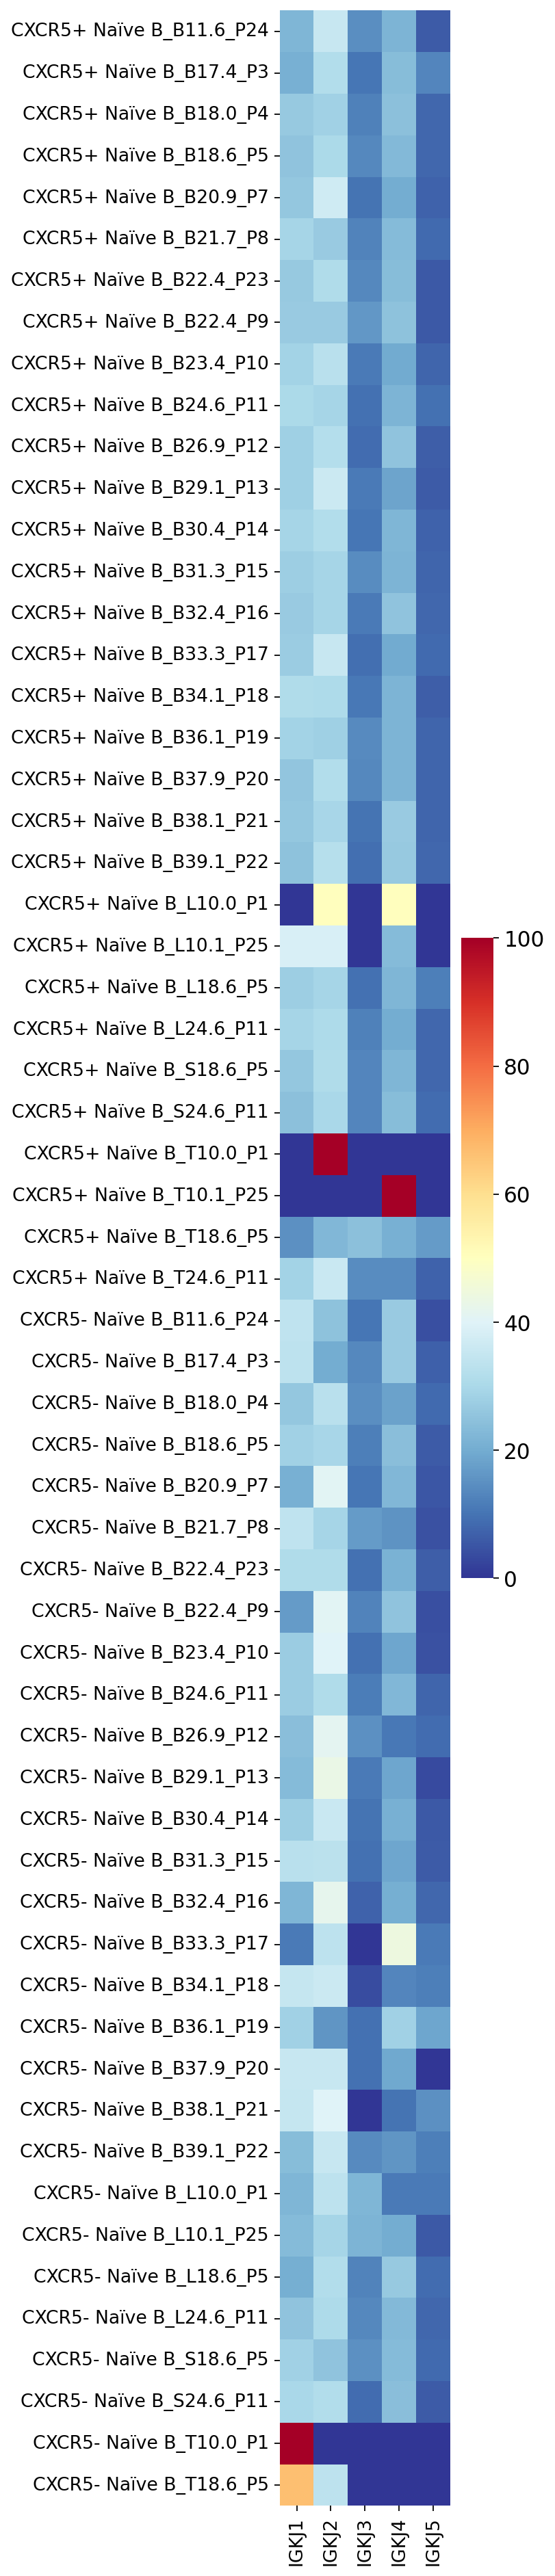

In [64]:
# subIGKV=adata.obs['v_call_B_VJ_main']
subIGKJV = adata[adata.obs['j_call_B_VJ_main'].str.contains('IGKJ')]
subIGKJV_select=subIGKJV[subIGKJV.obs['Last_cell_type'].isin(['CXCR5+ Naïve B', 'CXCR5- Naïve B'])]
subIGKJV_select = subIGKJV_select[~subIGKJV_select.obs['AdjustedID'].str.startswith('T12')]
# subIGKJV_select = subIGKJV_select[~subIGKJV_select.obs['AdjustedID'].str.startswith('L12')]
subIGKJV_select.obs['Organ_cell_type']=subIGKJV_select.obs['Last_cell_type'].astype('str')+"_"+subIGKJV_select.obs['AdjustedID'].astype('str')
# subIGKJV_select
from collections import Counter
subIGKJ_chain = None
ct_select=sorted(subIGKJV_select.obs['Organ_cell_type'].unique())
Dict = {'j_call_B_VJ_main':IGKJrealistvalues}

for name in list(Dict.keys()):
    df = pd.DataFrame(columns = Dict[name],  index = ct_select)
    
    for cell in df.index:
#         print(cell)
        counter = Counter(subIGKJV_select.obs.loc[subIGKJV_select.obs['Organ_cell_type']==cell,name])
#         print(counter)
        for chain_type in df.columns:
            df.loc[cell, chain_type]=counter[chain_type]
        
        df.loc[cell,:] = df.loc[cell,:] / np.sum(df.loc[cell,:]) * 100
    
    if subIGKJ_chain is None:
        subIGKJ_chain = df.copy()
    else:
        subIGKJ_chain = pd.concat([subIGKJ_chain, df], axis=1)
fig, ax = plt.subplots(figsize=(subIGKJ_chain.shape[1]/2,subIGKJ_chain.shape[0]/2))

uniform_data = subIGKJ_chain
uniform_data=uniform_data.astype('float')
ax = sb.heatmap(uniform_data,cmap='RdYlBu_r', yticklabels=True)
_, xlabels = plt.xticks()
_, ylabels = plt.yticks()
ax.set_xticklabels(xlabels, size=12,rotation=90)
ax.set_yticklabels(ylabels, size=12,rotation=0)


In [65]:
BCRL_chainlong=BCRL_chain.reset_index().rename(columns={'index': 'Sample'}).melt(id_vars=['Sample'])
BCRL_chainlong

Sample   variable     value
0      CXCR5+ Naïve B_B11.6_P24  IGKV1-NL1  0.459418
1       CXCR5+ Naïve B_B17.4_P3  IGKV1-NL1       0.0
2       CXCR5+ Naïve B_B18.0_P4  IGKV1-NL1       0.0
3       CXCR5+ Naïve B_B18.6_P5  IGKV1-NL1  0.276753
4       CXCR5+ Naïve B_B20.9_P7  IGKV1-NL1  0.520833
...                         ...        ...       ...
10182   CXCR5- Naïve B_S18.6_P5    IGLV3-1       0.0
10183  CXCR5- Naïve B_S24.6_P11    IGLV3-1  0.862069
10184   CXCR5- Naïve B_T10.0_P1    IGLV3-1       0.0
10185   CXCR5- Naïve B_T18.6_P5    IGLV3-1       0.0
10186  CXCR5- Naïve B_T24.6_P11    IGLV3-1       0.0

[10187 rows x 3 columns]

In [66]:
# v_call_B_VJ_main_list

In [67]:

# lst = v_call_B_VJ_main_list

# lst = [s for s in lst if s.split('-')[1].isdigit()]

# sort_key = lambda s: (s[:4], int(s.split('-')[1]))


# BRLsorted_lst = sorted(lst, key=sort_key)

# print(BRLsorted_lst)
# print(len(lst))
# print(len(sorted_lst))

In [ ]:
# print(lst)

In [ ]:
# %%R
# setdiff(BCRL_chainlong$variable,BRLsorted_lst)
# wide_data


In [ ]:
%%R
row_split_vector <- c(rep(1, 27), rep(2, 2),rep(3, 2))
row_split_vector

In [ ]:
%%R  -w 3600 -h 2400 -r 300 -i BCRL_chainlong -i IGKlistvalues

library(tidyverse)
library(scales)
library(ggplot2)
library(dplyr)
library(RColorBrewer )
BCRL=BCRL_chainlong
BRLsorted_lst=IGKlistvalues
BCRL$variable<-factor(BCRL$variable,level=BRLsorted_lst)

library(dplyr)



split_BCRL<- strsplit(BCRL$Sample, "_")


BCRL$CellType <- sapply(split_BCRL, "[", 1)
BCRL$AdjusteID<- sapply(split_BCRL, "[", 2)

BCRL$Organ <- substr(BCRL$AdjusteID, 1, 1)
BCRL$Sample<-factor(BCRL$Sample,level=rev(sort(unique(BCRL$Sample))))
BCRL2 <- BCRL %>% group_by(variable) %>% filter(sum(as.numeric(value) )!= 0) %>%ungroup()


BCRL2$CellType_Organ <- paste(BCRL2$CellType, BCRL2$Organ, sep = "_")

wide_data <- spread(BCRL2, variable, value)
rownames(wide_data) <- wide_data$Sample
wide_data$Sample <- NULL 


annotations <- BCRL2 %>% 
  select(Sample, CellType, Organ) %>% 
  distinct() %>% 
  column_to_rownames("Sample")


annotations[] <- lapply(annotations, as.factor)



wide_data <- wide_data %>%
  mutate(AdjustedID_num = as.numeric(str_extract(AdjusteID, "\\d+\\.\\d")))


wide_data$Organ <- factor(wide_data$Organ, levels = c("B", "L", "T", "S"))


wide_data <- wide_data %>% arrange(CellType,Organ, AdjustedID_num)
# wide_data
wide_data <- wide_data %>%
  select(-AdjustedID_num)

mat <- sapply(wide_data[,-c(1:4)], as.numeric)

rownames(mat)<-wide_data$AdjusteID

annotation_colors <- list(
  CellType = c('CXCR5+ Naïve B' = "#0081C9", 'CXCR5- Naïve B' = "#0f6657"),
  Organ = c(B = "#F6313E", L = "#fb862b",T = "#6a73cf" , S ="#0eb0c8")
)

color_vector <-rev(colorRampPalette(brewer.pal(11, "RdYlBu"))(10))

annotations$Organ = factor(annotations$Organ, levels = c("B", "L", "T", "S"))
row_anno <- rowAnnotation(df = annotations, col = annotation_colors)

row_split_vector <- c(rep(1, 21), rep(2, 4),rep(3, 2),rep(4, 2),rep(5, 21),rep(6,4),rep(7,2),rep(8,nrow(mat)-21-4-2-2-21-4-2))
row_split_vector
# split_points <- c(22, 25, 27, 29, nrow(mat))
# split_counts <- diff(split_points)
# row_split_vector <- unlist(mapply(rep, 1:length(split_counts), split_counts))

BCRLheatmap <- Heatmap(mat, 
  name = "value",
  col = color_vector,
  cluster_rows = FALSE, row_title = NULL ,
  cluster_columns = FALSE,
rect_gp = gpar(col = "black", lwd = 0.01),column_title = "IGKV/IGLV",
                   row_split = row_split_vector,show_row_names = T)      


row_anno+BCRLheatmap 

In [ ]:
%%R
# BCRL_chainlong

In [ ]:
%%R  -w 3600 -h 2400 -r 300 -i BCRL_chainlong -i IGKlistvalues
BCRLVheatmap <- BCRTR_heatmap(BCRL_chainlong, IGKlistvalues,titlename="IGKV/IGLV")
# print(heatmap)
BCRLVheatmap[[1]]+BCRLVheatmap[[2]]

In [ ]:
subBCRK_chainlong=subBCRK_chain.reset_index().rename(columns={'index': 'Sample'}).melt(id_vars=['Sample'])
subBCRK_chainlong

In [ ]:
# %%R  -w 3600 -h 2400 -r 300 -i subBCRK_chainlong -i IGKrealistvalues
# subBCRKVheatmap <- BCRTR_heatmap(subKBCRK_chainlong, IGKrealistvalues,titlename="IGKV")
# # print(heatmap)
# subBCRKVheatmap[[1]]+subBCRKVheatmap[[2]]

In [ ]:
subBCRL_chainlong=subBCRL_chain.reset_index().rename(columns={'index': 'Sample'}).melt(id_vars=['Sample'])
subBCRL_chainlong

In [ ]:
%%R
# subBCRL_chainlong[,]
head(subBCRL_chainlong)
str(subBCRL_chainlong)
# subBCRL_chainlong[which(as.numeric(subBCRL_chainlong$value)==100),]$value

# subBCRL_chainlong[which(as.numeric(subBCRL_chainlong$value)==100),][,3]<-"50"
# subBCRL_chainlong[which(as.numeric(subBCRL_chainlong$value)==100),][,3]
# subBCRL_chainlong$value[which(as.numeric(subBCRL_chainlong$value)>40)]

In [ ]:
%%R  -w 3600 -h 2400 -r 300 -i subBCRL_chainlong -i IGLrealistvalues
# subBCRL_chainlong[,which(subBCRL_chainlong$value)=="100"]
subBCRL_chainlong$value[which(as.numeric(subBCRL_chainlong$value)==100)] <- median(subBCRL_chainlong$value)
subBCRL_chainlong$value[which(as.numeric(subBCRL_chainlong$value)>50)] <- median(subBCRL_chainlong$value)
subBCRLVheatmap <- BCRTR_heatmap(subBCRL_chainlong, IGLrealistvalues,titlename="IGLV")
# print(heatmap)
subBCRLVheatmap[[1]]+subBCRLVheatmap[[2]]

In [ ]:
%%R  -w 3600 -h 2400 -r 300 -i subBCRK_chainlong -i IGKrealistvalues

# print(heatmap)
subBCRK_chainlong$value[which(as.numeric(subBCRK_chainlong$value)==100)] <- median(subBCRK_chainlong$value)
subBCRK_chainlong$value[which(as.numeric(subBCRK_chainlong$value)>80)] <- median(subBCRK_chainlong$value)
subBCRKVheatmap <- BCRTR_heatmap(subBCRK_chainlong, IGKrealistvalues,titlename="IGKV")
subBCRKVheatmap[[1]]+subBCRKVheatmap[[2]]

In [ ]:
%%R  -w 6600 -h 2400 -r 300 
# row_anno+BCRH_heatmap+BCRLheatmap 
BCRHVheatmap[[1]]+BCRHVheatmap[[2]]+BCRLVheatmap[[2]]

In [ ]:


adata_select=adata[adata.obs['Last_cell_type'].isin(['CXCR5- Naïve B','CXCR5+ Naïve B'])]
adata_select = adata_select[~adata_select.obs['AdjustedID'].str.startswith('T12')]

adata_select.obs['Organ_cell_type']=adata_select.obs['Last_cell_type'].astype('str')+"_"+adata_select.obs['AdjustedID'].astype('str')
# adata_select
from collections import Counter
BCRJ_chain = None
ct_select=sorted(adata_select.obs['Organ_cell_type'].unique())
Dict = {'j_call_B_VDJ_main':j_call_B_VDJ_main_list}

for name in list(Dict.keys()):
    df = pd.DataFrame(columns = Dict[name],  index = ct_select)
    
    for cell in df.index:
#         print(cell)
        counter = Counter(adata_select.obs.loc[adata_select.obs['Organ_cell_type']==cell,name])
#         print(counter)
        for chain_type in df.columns:
            df.loc[cell, chain_type]=counter[chain_type]
        
        df.loc[cell,:] = df.loc[cell,:] / np.sum(df.loc[cell,:]) * 100
    
    if BCRJ_chain is None:
        BCRJ_chain = df.copy()
    else:
        BCRJ_chain = pd.concat([BCRJ_chain, df], axis=1)
fig, ax = plt.subplots(figsize=(BCRJ_chain.shape[1]/2,BCRJ_chain.shape[0]/2))
#sb.set_theme()
uniform_data = BCRJ_chain
uniform_data=uniform_data.astype('float')
ax = sb.heatmap(uniform_data, cmap='RdYlBu_r', yticklabels=True, linewidths=0)

_, xlabels = plt.xticks()
_, ylabels = plt.yticks()
ax.set_xticklabels(xlabels, size=12,rotation=90)
ax.set_yticklabels(ylabels, size=12,rotation=0)
# plt.savefig(fig_path+'gdBCRJ_heatmap.pdf',bbox_inches='tight');

In [ ]:
BCRJ_chainlong=BCRJ_chain.reset_index().rename(columns={'index': 'Sample'}).melt(id_vars=['Sample'])
BCRJ_chainlong

In [ ]:
# %%R  -w 3600 -h 2400 -r 300 -i BCRJ_chainlong -i j_call_B_VJ_main_list

# library(tidyverse)
# library(scales)
# library(ggplot2)
# library(dplyr)
# library(RColorBrewer )
# BCRJ=BCRJ_chainlong
# BCRJ$variable<-factor(BCRJ$variable,level=j_call_B_VJ_main_list)

# library(dplyr)



# split_BCRJ<- strsplit(BCRJ$Sample, "_")


# BCRJ$CellType <- sapply(split_BCRJ, "[", 1)
# BCRJ$AdjusteID<- sapply(split_BCRJ, "[", 2)

# BCRJ$Organ <- substr(BCRJ$AdjusteID, 1, 1)
# BCRJ$Sample<-factor(BCRJ$Sample,level=rev(sort(unique(BCRJ$Sample))))
# BCRJ2 <- BCRJ %>% group_by(variable) %>% filter(sum(as.numeric(value) )!= 0) %>%ungroup()


# BCRJ2$CellType_Organ <- paste(BCRJ2$CellType, BCRJ2$Organ, sep = "_")
# BCRJ2

In [ ]:
%%R
wide_data

In [ ]:
# %%R
# wide_data$AdjusteID

In [ ]:
%%R  -w 1600 -h 600 -r 300 -i BCRJ_chainlong -i j_call_B_VDJ_main_list

library(tidyverse)
library(scales)
library(ggplot2)
library(dplyr)
library(RColorBrewer )
BCRJ=BCRJ_chainlong
BCRJ$variable<-factor(BCRJ$variable,level=j_call_B_VDJ_main_list)

library(dplyr)



split_BCRJ<- strsplit(BCRJ$Sample, "_")


BCRJ$CellType <- sapply(split_BCRJ, "[", 1)
BCRJ$AdjusteID<- sapply(split_BCRJ, "[", 2)

BCRJ$Organ <- substr(BCRJ$AdjusteID, 1, 1)
BCRJ$Sample<-factor(BCRJ$Sample,level=rev(sort(unique(BCRJ$Sample))))
BCRJ2 <- BCRJ %>% group_by(variable) %>% filter(sum(as.numeric(value) )!= 0) %>%ungroup()


BCRJ2$CellType_Organ <- paste(BCRJ2$CellType, BCRJ2$Organ, sep = "_")

wide_data <- spread(BCRJ2, variable, value)
rownames(wide_data) <- wide_data$Sample
wide_data$Sample <- NULL 


annotations <- BCRJ2 %>% 
  select(Sample, CellType, Organ) %>% 
  distinct() %>% 
  column_to_rownames("Sample")


annotations[] <- lapply(annotations, as.factor)



wide_data <- wide_data %>%
  mutate(AdjustedID_num = as.numeric(str_extract(AdjusteID, "\\d+\\.\\d")))


wide_data$Organ <- factor(wide_data$Organ, levels = c("B", "L", "T", "S"))


wide_data <- wide_data %>% arrange(CellType,Organ, AdjustedID_num)
# wide_data
wide_data <- wide_data %>%
  select(-AdjustedID_num)

mat <- sapply(wide_data[,-c(1:4)], as.numeric)

rownames(mat)<-wide_data$AdjusteID

annotation_colors <- list(
  CellType = c('CXCR5+ Naïve B' = "#0081C9", 'CXCR5- Naïve B' = "#0f6657"),
  Organ = c(B = "#F6313E", L = "#fb862b",T = "#0eb0c8", S = "#6a73cf")
)

color_vector <- rev(colorRampPalette(brewer.pal(11, "RdYlBu"))(100))

annotations$Organ = factor(annotations$Organ, levels = c("B", "L", "T", "S"))
row_anno <- rowAnnotation(df = annotations, col = annotation_colors)

row_split_vector <- c(rep(1, 29), rep(2, nrow(mat) - 29))
BCRJheatmap <- Heatmap(mat, 
  name = "value",
  col = color_vector,
  cluster_rows = FALSE, row_title = NULL ,
  cluster_columns = FALSE,
rect_gp = gpar(col = "white", lwd = 0.5),column_title = "IGHJ",
                   row_split = row_split_vector,show_row_names = T)      


row_anno+BCRJheatmap 

In [ ]:
%%R  -w 1600 -h 2600 -r 300 -i BCRJ_chainlong -i j_call_B_VDJ_main_list
BCRHJheatmap <- BCRTR_heatmap(BCRJ_chainlong, j_call_B_VDJ_main_list,titlename="IGHJ")
# print(heatmap)
BCRHJheatmap[[1]]+BCRHJheatmap[[2]]

In [ ]:
%%R  -w 6600 -h 2400 -r 300 
BCRHVheatmap[[1]]+BCRHVheatmap[[2]]+BCRHJheatmap[[2]]+BCRLVheatmap[[2]]
# row_anno+BCRH_heatmap+BCRJheatmap+ BCRLheatmap

In [ ]:


adata_select=adata[adata.obs['Last_cell_type'].isin(['CXCR5- Naïve B','CXCR5+ Naïve B'])]
adata_select = adata_select[~adata_select.obs['AdjustedID'].str.startswith('T12')]

adata_select.obs['Organ_cell_type']=adata_select.obs['Last_cell_type'].astype('str')+"_"+adata_select.obs['AdjustedID'].astype('str')
# adata_select
from collections import Counter
BCRLJ_chain = None
ct_select=sorted(adata_select.obs['Organ_cell_type'].unique())
Dict = {'j_call_B_VJ_main':j_call_B_VJ_main_list}

for name in list(Dict.keys()):
    df = pd.DataFrame(columns = Dict[name],  index = ct_select)
    
    for cell in df.index:
#         print(cell)
        counter = Counter(adata_select.obs.loc[adata_select.obs['Organ_cell_type']==cell,name])
#         print(counter)
        for chain_type in df.columns:
            df.loc[cell, chain_type]=counter[chain_type]
        
        df.loc[cell,:] = df.loc[cell,:] / np.sum(df.loc[cell,:]) * 100
    
    if BCRLJ_chain is None:
        BCRLJ_chain = df.copy()
    else:
        BCRLJ_chain = pd.concat([BCRLJ_chain, df], axis=1)
fig, ax = plt.subplots(figsize=(BCRLJ_chain.shape[1]/2,BCRLJ_chain.shape[0]/2))
#sb.set_theme()
uniform_data = BCRLJ_chain
uniform_data=uniform_data.astype('float')
ax = sb.heatmap(uniform_data, cmap='RdYlBu_r', yticklabels=True, linewidths=0)

_, xlabels = plt.xticks()
_, ylabels = plt.yticks()
ax.set_xticklabels(xlabels, size=12,rotation=90)
ax.set_yticklabels(ylabels, size=12,rotation=0)
# plt.savefig(fig_path+'gdBCRLJ_heatmap.pdf',bbox_inches='tight');

In [ ]:
BCRLJ_chainlong=BCRLJ_chain.reset_index().rename(columns={'index': 'Sample'}).melt(id_vars=['Sample'])
BCRLJ_chainlong

In [ ]:
%%R  -w 1600 -h 600 -r 300 -i BCRLJ_chainlong -i j_call_B_VJ_main_list

library(tidyverse)
library(scales)
library(ggplot2)
library(dplyr)
library(RColorBrewer )
BCRLJ=BCRLJ_chainlong
BCRLJ$variable<-factor(BCRLJ$variable,level=j_call_B_VJ_main_list)

library(dplyr)



split_BCRLJ<- strsplit(BCRLJ$Sample, "_")


BCRLJ$CellType <- sapply(split_BCRLJ, "[", 1)
BCRLJ$AdjusteID<- sapply(split_BCRLJ, "[", 2)

BCRLJ$Organ <- substr(BCRLJ$AdjusteID, 1, 1)
BCRLJ$Sample<-factor(BCRLJ$Sample,level=rev(sort(unique(BCRLJ$Sample))))
BCRLJ2 <- BCRLJ %>% group_by(variable) %>% filter(sum(as.numeric(value) )!= 0) %>%ungroup()


BCRLJ2$CellType_Organ <- paste(BCRLJ2$CellType, BCRLJ2$Organ, sep = "_")

wide_data <- spread(BCRLJ2, variable, value)
rownames(wide_data) <- wide_data$Sample
wide_data$Sample <- NULL 


annotations <- BCRLJ2 %>% 
  select(Sample, CellType, Organ) %>% 
  distinct() %>% 
  column_to_rownames("Sample")


annotations[] <- lapply(annotations, as.factor)



wide_data <- wide_data %>%
  mutate(AdjustedID_num = as.numeric(str_extract(AdjusteID, "\\d+\\.\\d")))


wide_data$Organ <- factor(wide_data$Organ, levels = c("B", "L", "T", "S"))


wide_data <- wide_data %>% arrange(CellType,Organ, AdjustedID_num)
# wide_data
wide_data <- wide_data %>%
  select(-AdjustedID_num)

mat <- sapply(wide_data[,-c(1:4)], as.numeric)

rownames(mat)<-wide_data$AdjusteID

annotation_colors <- list(
  CellType = c('CXCR5+ Naïve B' = "#0081C9", 'CXCR5- Naïve B' = "#0f6657"),
  Organ = c(B = "#F6313E", L = "#fb862b",T = "#0eb0c8", S = "#6a73cf")
)

color_vector <- rev(colorRampPalette(brewer.pal(11, "RdYlBu"))(100))


row_anno <- rowAnnotation(df = annotations, col = annotation_colors)

row_split_vector <- c(rep(1, 29), rep(2, nrow(mat) - 29))
BCRLJheatmap <- Heatmap(mat, 
  name = "value",
  col = color_vector,
  cluster_rows = FALSE, row_title = NULL ,
  cluster_columns = FALSE,column_title = "IGKJ/IGLJ",
rect_gp = gpar(col = "white", lwd = 0.5),
                   row_split = row_split_vector,show_row_names = FALSE)      


row_anno+BCRLJheatmap 
# main = "My Heatmap Title"
# draw(BCRLJheatmap ,main = "My Heatmap Title")

In [ ]:
%%R  -w 1600 -h 600 -r 300 -i BCRLJ_chainlong -i j_call_B_VJ_main_list
BCRLJheatmap <- BCRTR_heatmap(BCRLJ_chainlong, j_call_B_VJ_main_list,titlename="IGKJ/IGLJ")
# print(heatmap)
BCRLJheatmap[[1]]+BCRLJheatmap[[2]]

In [ ]:
IGKJJ_chainlong=subIGKJ_chain.reset_index().rename(columns={'index': 'Sample'}).melt(id_vars=['Sample'])
IGKJJ_chainlong

In [ ]:
IGLJJ_chainlong=subIGLJ_chain.reset_index().rename(columns={'index': 'Sample'}).melt(id_vars=['Sample'])
IGLJJ_chainlong

In [ ]:
%%R  -w 1600 -h 2000 -r 300 -i IGKJJ_chainlong -i j_call_B_VJ_main_list
IGKJJ_chainlong$value[which(as.numeric(IGKJJ_chainlong$value)==100)] <- median(IGKJJ_chainlong$value)
# IGKJJ_chainlong$value[which(as.numeric(IGKJJ_chainlong$value)>50)] <- median(IGKJJ_chainlong$value)
IGKJJheatmap <- BCRTR_heatmap(IGKJJ_chainlong, j_call_B_VJ_main_list,titlename="IGKJ")
# print(heatmap)
IGKJJheatmap[[1]]+IGKJJheatmap[[2]]

In [ ]:
%%R  -w 1600 -h 2000 -r 300 -i IGLJJ_chainlong -i j_call_B_VJ_main_list
IGLJJheatmap <- BCRTR_heatmap(IGLJJ_chainlong, j_call_B_VJ_main_list,titlename="IGLJ")
# print(heatmap)
IGLJJheatmap[[1]]+IGLJJheatmap[[2]]

In [ ]:
%%R  -w 6600 -h 2400 -r 300 
# row_anno+BCRH_heatmap+BCRJheatmap+ BCRLheatmap+BCRLJheatmap 

In [ ]:
%%R  -w 6600 -h 2400 -r 300 
# row_anno+BCRH_heatmap+BCRLheatmap 
BCRHVheatmap[[1]]+BCRHVheatmap[[2]]+BCRHJheatmap[[2]]+BCRLVheatmap[[2]]+BCRLJheatmap[[2]]

In [ ]:
%%R  -w 4600 -h 2400 -r 300 
# row_anno+BCRH_heatmap+BCRLheatmap 
BCRHVheatmap[[1]]+BCRHVheatmap[[2]]+BCRHJheatmap[[2]]

In [ ]:
%%R  -w 4600 -h 2400 -r 300 
# row_anno+BCRH_heatmap+BCRLheatmap 
subBCRLVheatmap[[1]]+subBCRLVheatmap[[2]]+IGLJJheatmap[[2]]

In [ ]:
%%R  -w 4600 -h 2400 -r 300 
# row_anno+BCRH_heatmap+BCRLheatmap 
subBCRKVheatmap[[1]]+subBCRKVheatmap[[2]]+IGKJJheatmap[[2]]

In [ ]:
%%R  -w 8000 -h 2400 -r 300 

BCRHVheatmap[[1]]+BCRHVheatmap[[2]]+BCRHJheatmap[[2]]+subBCRLVheatmap[[2]]+IGLJJheatmap[[2]]+subBCRKVheatmap[[2]]+IGKJJheatmap[[2]]

In [ ]:
%%R
# head(TCRH2)
write.csv(BCRH_chainlong,'~/Allcount/All_scanpyData/BCRTCRchain/BCRH_chainlong.csv')

In [ ]:
%%R
# head(TCRH2)
write.csv(IGHlistvalues ,'~/Allcount/All_scanpyData/BCRTCRchain/IGHlistvalues.csv')

In [ ]:
%%R
# head(TCRH2)
write.csv(BCRL_chainlong,'~/Allcount/All_scanpyData/BCRTCRchain/BCRL_chainlong.csv')

In [ ]:
%%R
# head(TCRH2)
write.csv(BCRLJ_chainlong,'~/Allcount/All_scanpyData/BCRTCRchain/BCRLJ_chainlong.csv')

In [ ]:
%%R
# head(TCRH2)
write.csv(BCRJ_chainlong,'~/Allcount/All_scanpyData/BCRTCRchain/BCRHJ_chainlong.csv')

In [ ]:
%%R
# head(TCRH2)
write.csv(j_call_B_VJ_main_list ,'~/Allcount/All_scanpyData/BCRTCRchain/j_call_B_VJ_main_list.csv')

In [ ]:
%%R
# head(TCRH2)
write.csv(j_call_B_VDJ_main_list ,'~/Allcount/All_scanpyData/BCRTCRchain/j_call_B_VDJ_main_list.csv')

In [ ]:
%%R
# head(TCRH2)
write.csv(IGKlistvalues ,'~/Allcount/All_scanpyData/BCRTCRchain/IGKlistvalues.csv')